In [4]:
import sys
import os
sys.path.append(os.getcwd() + '/../')

from dataset_utils import *
from main_nusc import data_path
import pandas as pd
from ast import literal_eval

In [ ]:
save_path = '../runs'
#run = 'indigo-boat'
#run = 'allegro-skillset'
run = ''
filename = 'products.csv'

results_file = os.path.join(save_path, run, 'results', filename)

df = pd.read_csv(results_file)

In [13]:
len(actions)
actions

['stop',
 'back',
 'drive straight',
 'accelerate',
 'decelerate',
 'turn left',
 'turn right',
 'uturn',
 'change lane left',
 'change lane right',
 'overtake',
 'END',
 None]

In [14]:
accs = []
T_actions = np.zeros(len(actions))
F_actions = np.zeros(len(actions))
for idx in range(len(df)):
    item = df.iloc[idx]
    past_len = item['past_len']

    gt = literal_eval(item['gt_seq'])

    pred = literal_eval(item['prediction'])

    mask = [gt[i] == pred[i] for i in range(past_len, len(pred))]
    total = len(mask)
    correct = mask.count(True)
    acc = correct/total
    accs.append(acc)

    for i,a in enumerate(gt[past_len:len(pred)]):
        act_idx = actions_dict[a]
        if mask[i]:
            T_actions[act_idx] += 1
        else:
            F_actions[act_idx] += 1

total_actions = T_actions + F_actions
mean_actions = T_actions/total_actions

classes_acc = {actions[i]:mean_actions[i] for i in range(len(actions))}
print(classes_acc)
print(np.mean(np.array(accs)))

{'stop': 0.31626120358514725, 'back': 0.0, 'drive straight': 0.5652467883705207, 'accelerate': 0.17473395125300378, 'decelerate': 0.1725721784776903, 'turn left': 0.0, 'turn right': 0.0, 'uturn': nan, 'change lane left': 0.0, 'change lane right': 0.0, 'overtake': 0.0, 'END': 0.013888888888888888, None: nan}
0.23472757095992008


/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


: 

In [37]:
nusc_data = NuScenesSimple(data_path, [str(i) for i in range(2454)], mode='test', obs_perc=1)
#nusc_data = NuScenesSimple(data_path, [str(i) for i in range(2456)], mode='train')

In [38]:
lane_change_idxs = []
for i,n in enumerate(nusc_data):
    action_list = n['actions'].int().tolist() 
    if 8 in action_list or 9 in action_list:
        lane_change_idxs.append(i)

print(len(lane_change_idxs)/3)
    

153.0


In [39]:
print(lane_change_idxs)

[12, 13, 14, 27, 28, 29, 63, 64, 65, 66, 67, 68, 72, 73, 74, 114, 115, 116, 117, 118, 119, 135, 136, 137, 147, 148, 149, 153, 154, 155, 159, 160, 161, 162, 163, 164, 165, 166, 167, 174, 175, 176, 177, 178, 179, 180, 181, 182, 186, 187, 188, 189, 190, 191, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 243, 244, 245, 249, 250, 251, 264, 265, 266, 270, 271, 272, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 300, 301, 302, 339, 340, 341, 342, 343, 344, 360, 361, 362, 420, 421, 422, 444, 445, 446, 492, 493, 494, 516, 517, 518, 522, 523, 524, 540, 541, 542, 543, 544, 545, 552, 553, 554, 570, 571, 572, 576, 577, 578, 597, 598, 599, 612, 613, 614, 633, 634, 635, 657, 658, 659, 660, 661, 662, 696, 697, 698, 726, 727, 728, 729, 730, 731, 741, 742, 743, 750, 751, 752, 792, 793, 794, 795, 796, 797, 801, 802, 803, 816, 817, 818, 822, 823, 824, 837, 838, 839, 840, 841, 842, 843, 844, 845, 876, 877, 878, 879, 880, 881, 882, 883, 884, 924, 925, 926, 963, 964, 965, 1002, 100

/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])
/home/muyang/miniconda3/envs/nuscenes/lib/python3.7/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/home/muyang/nuscenes_action_segmentation/notebooks/../dataset_utils.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


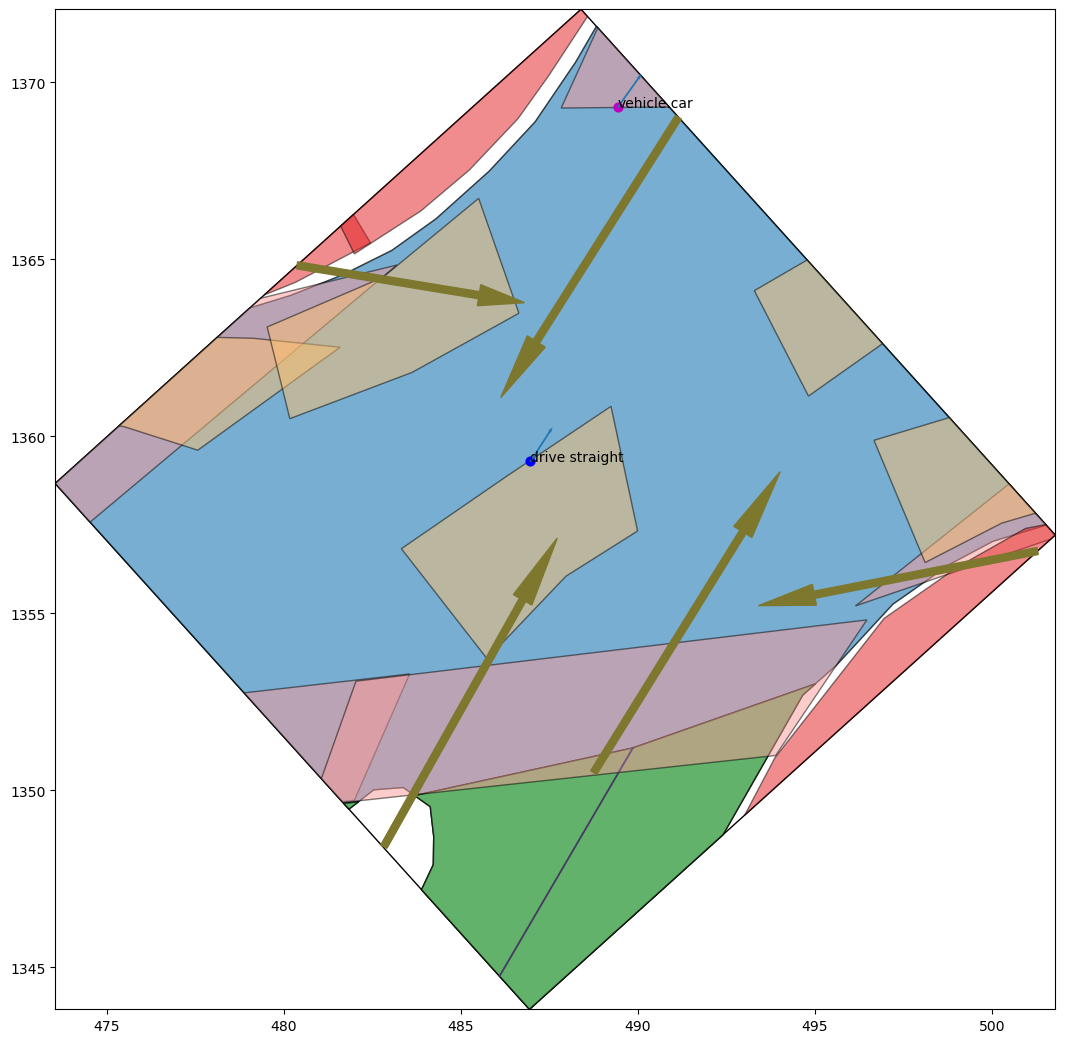

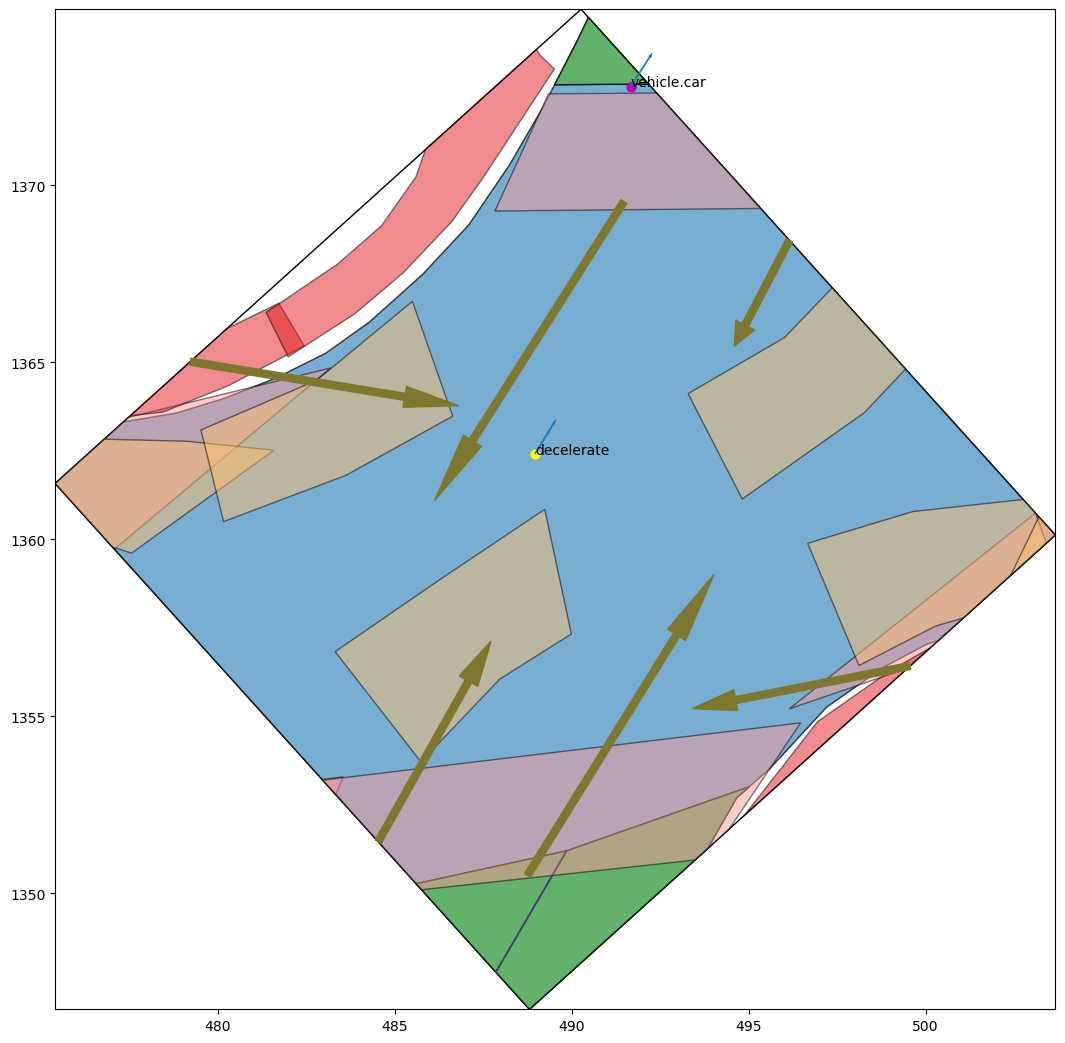

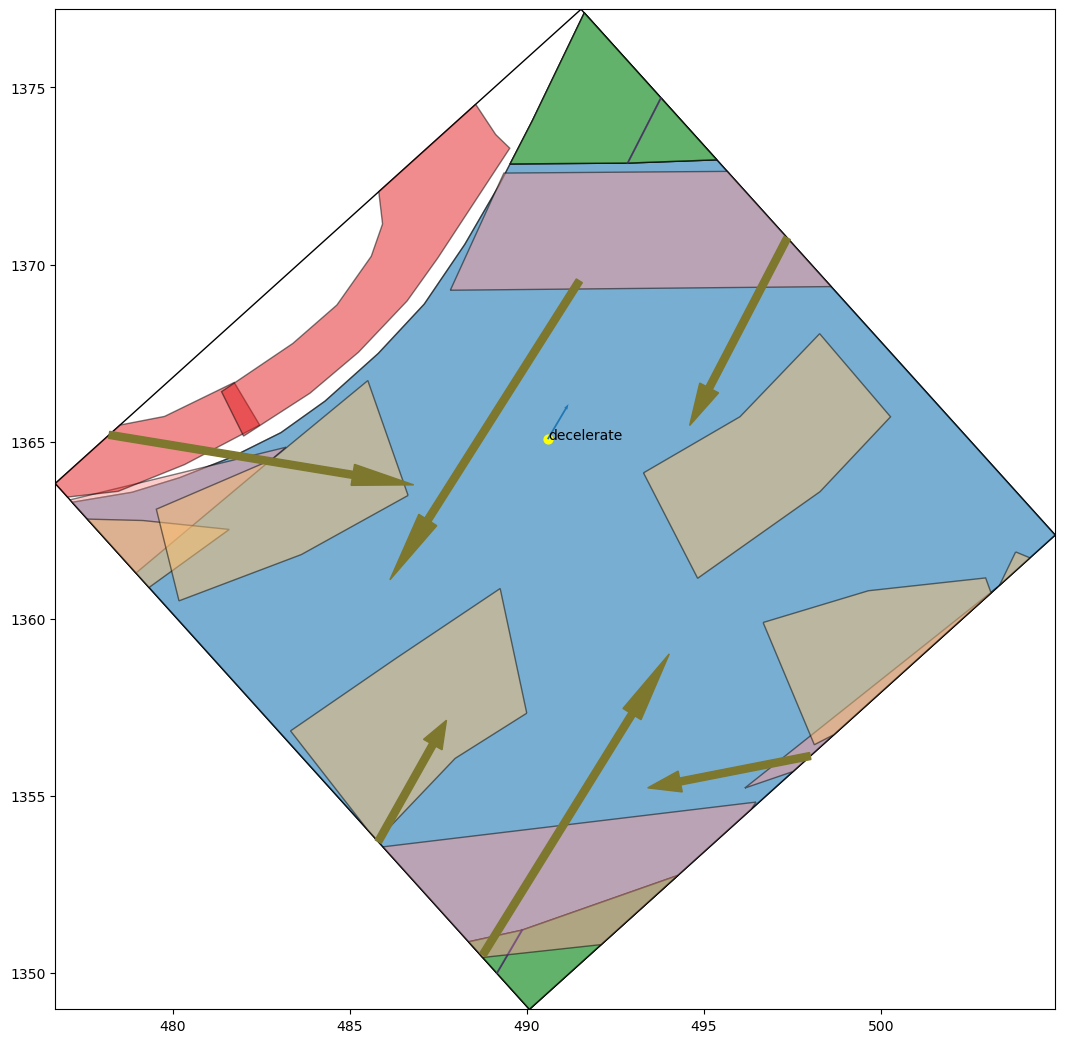

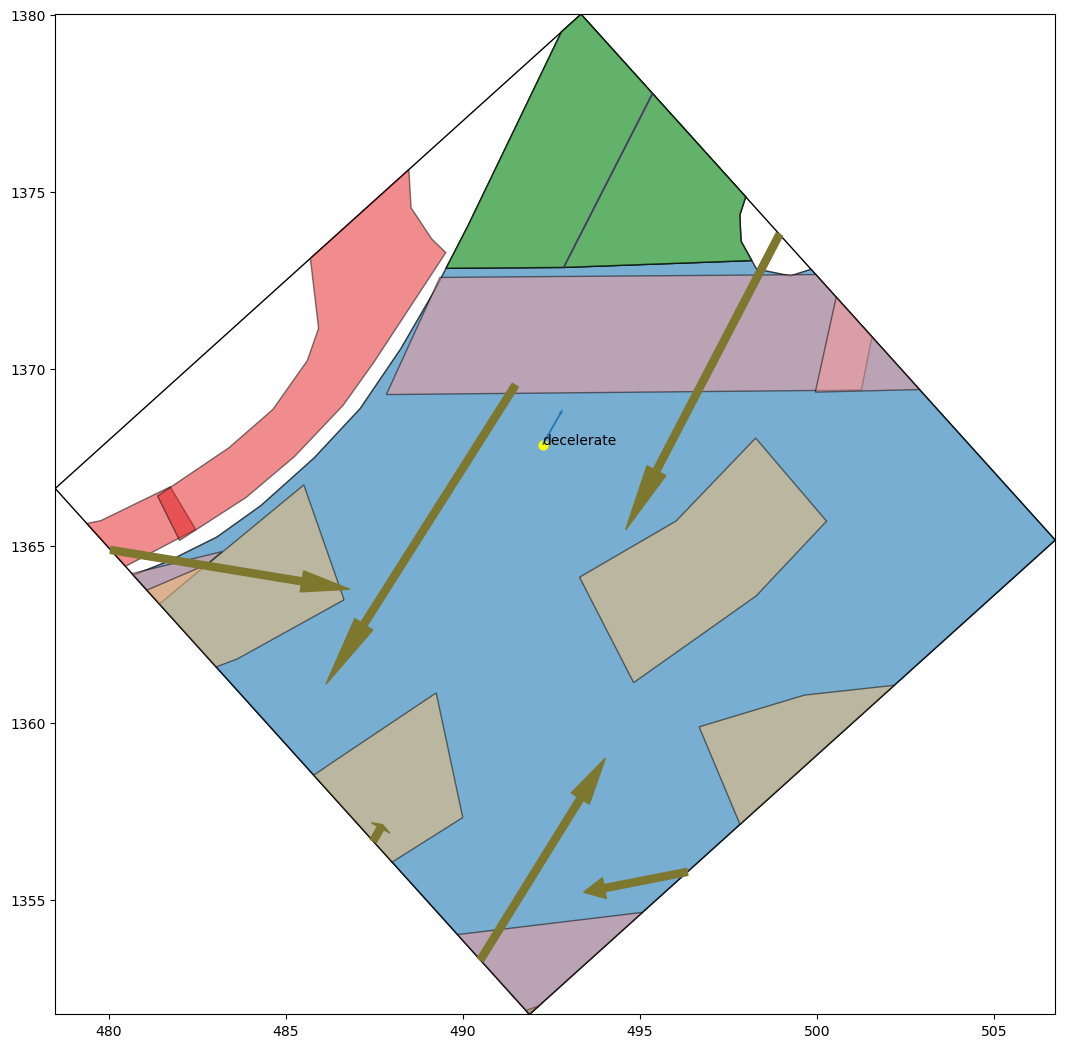

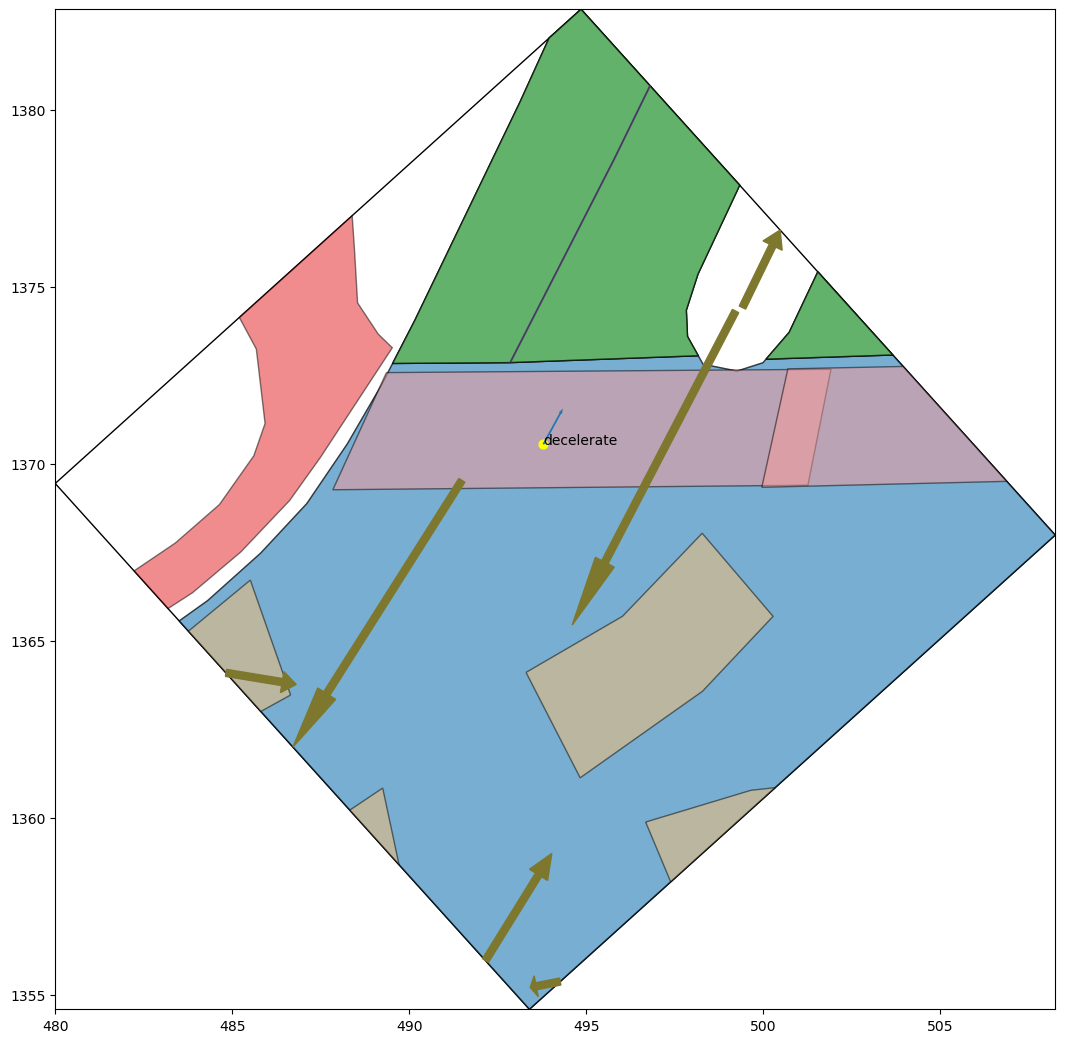

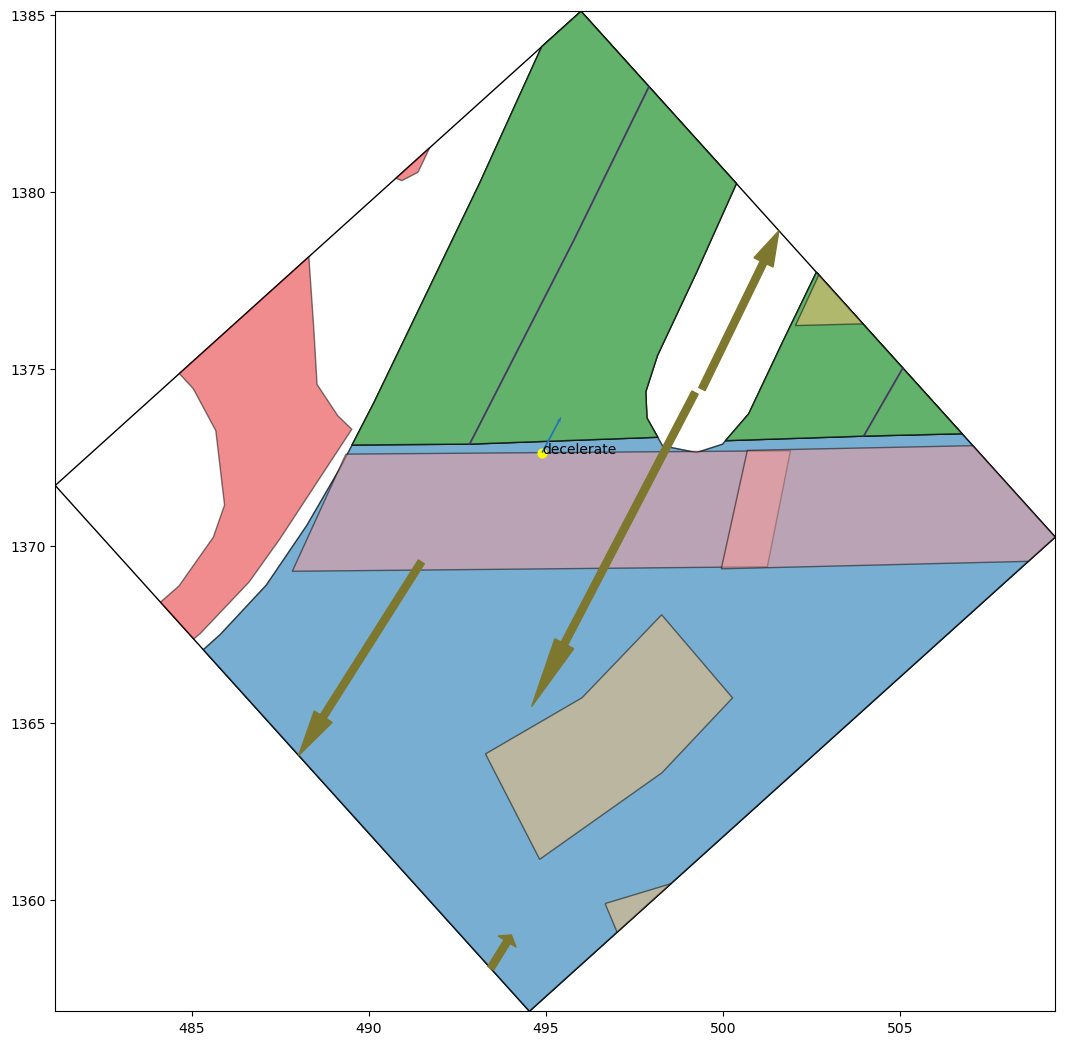

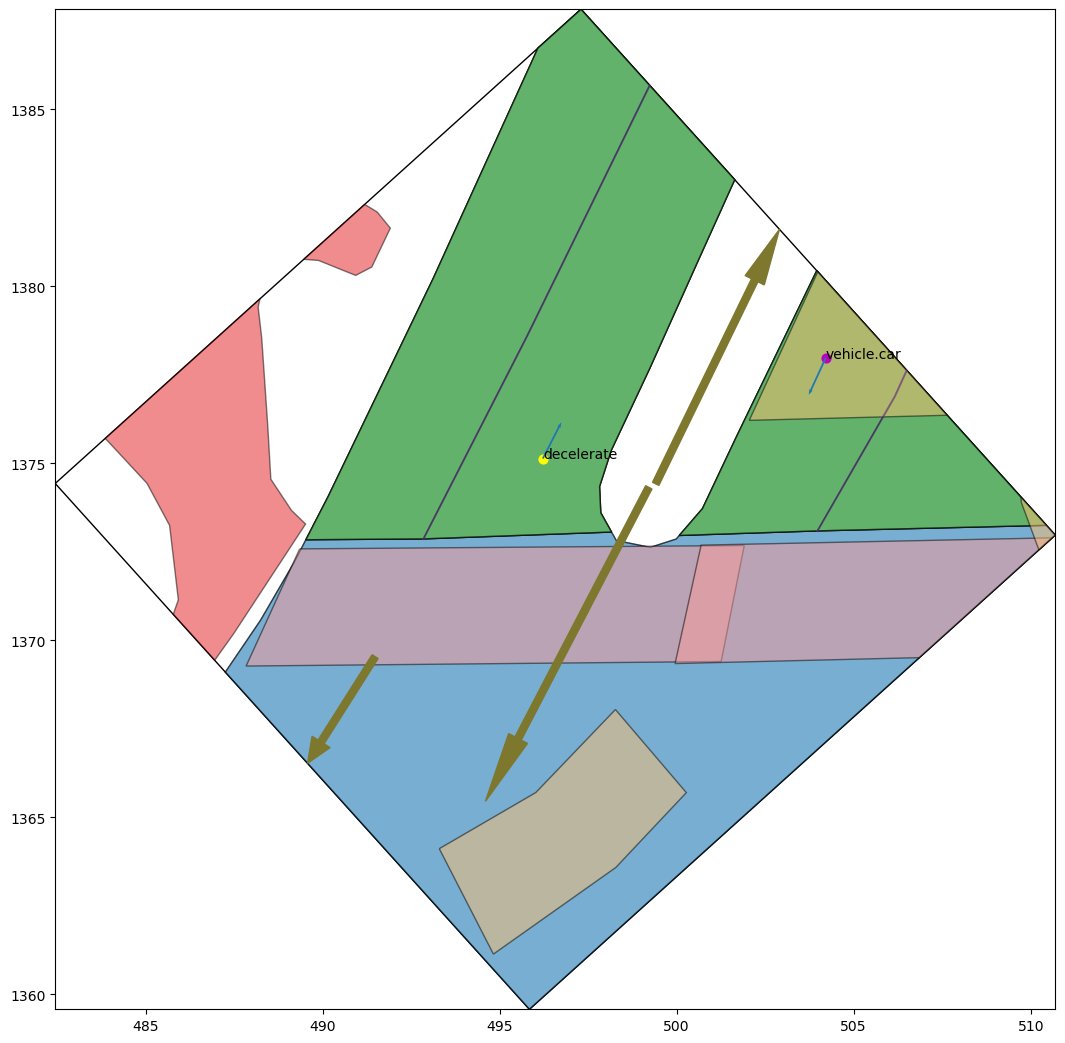

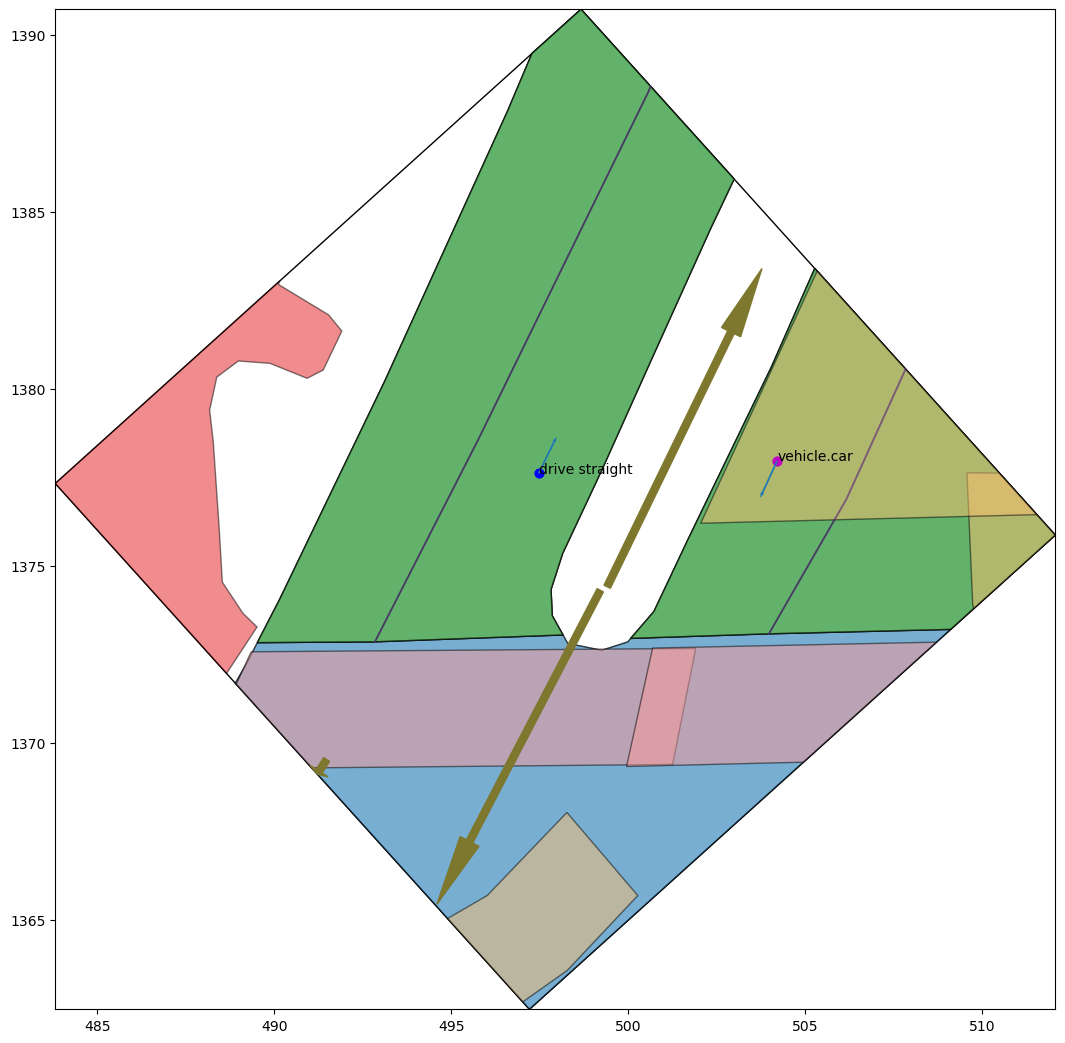

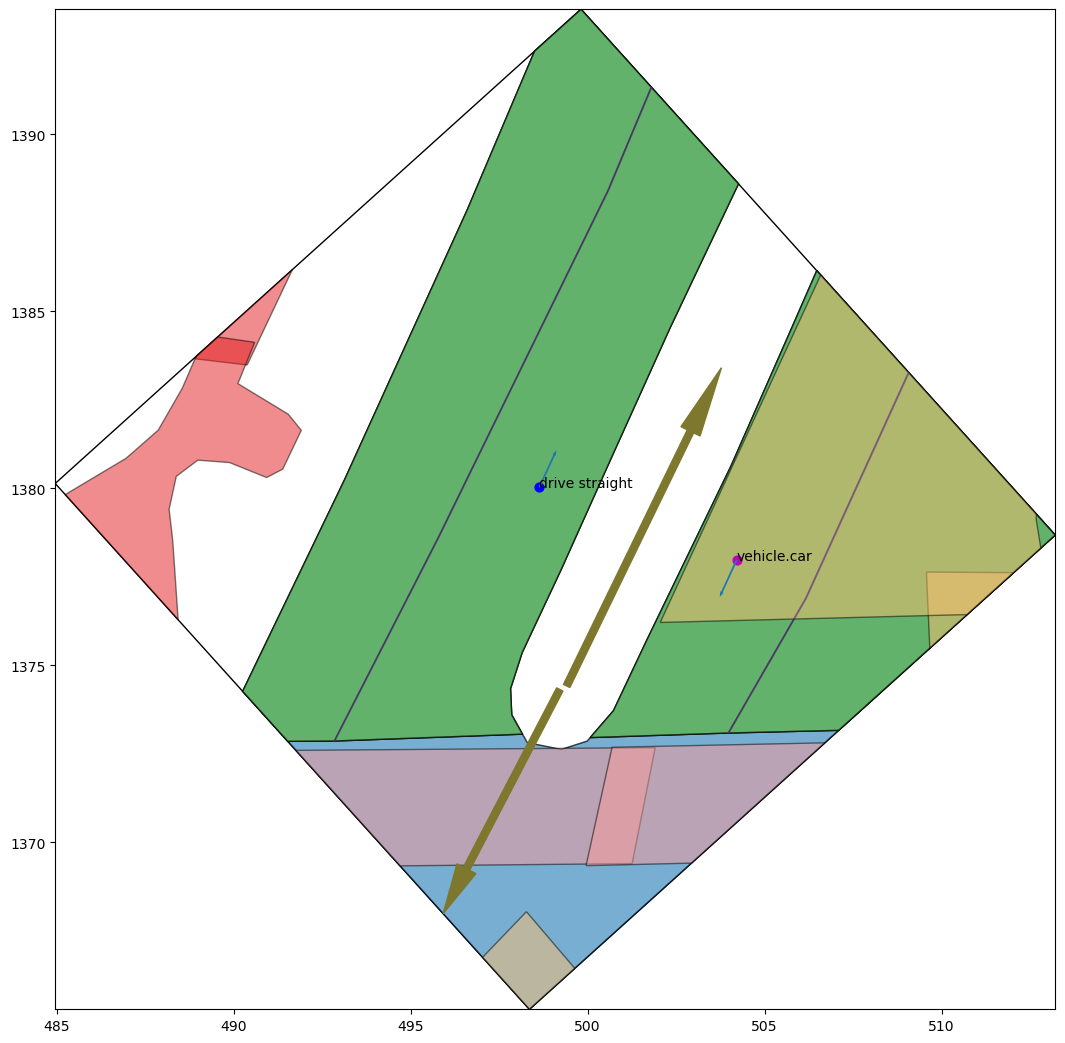

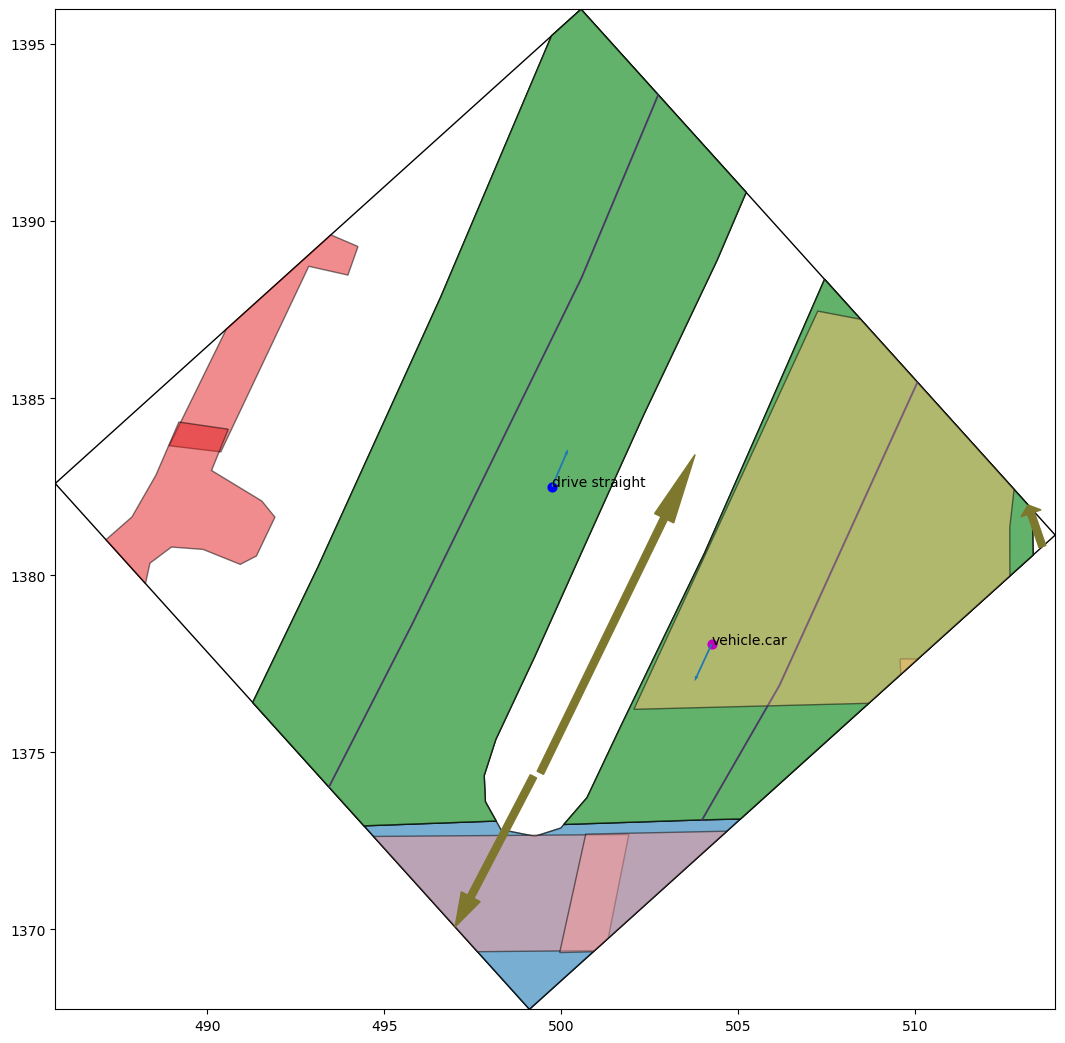

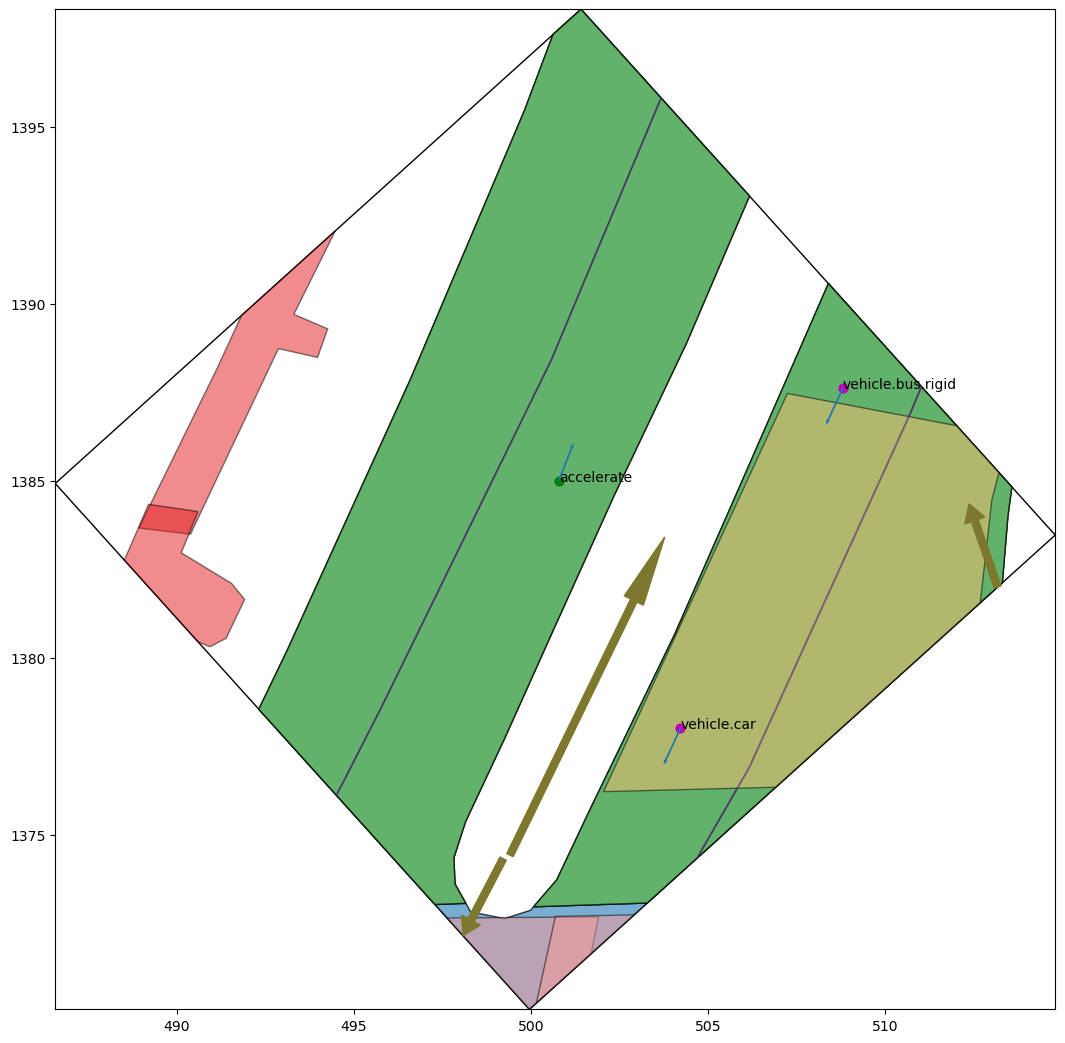

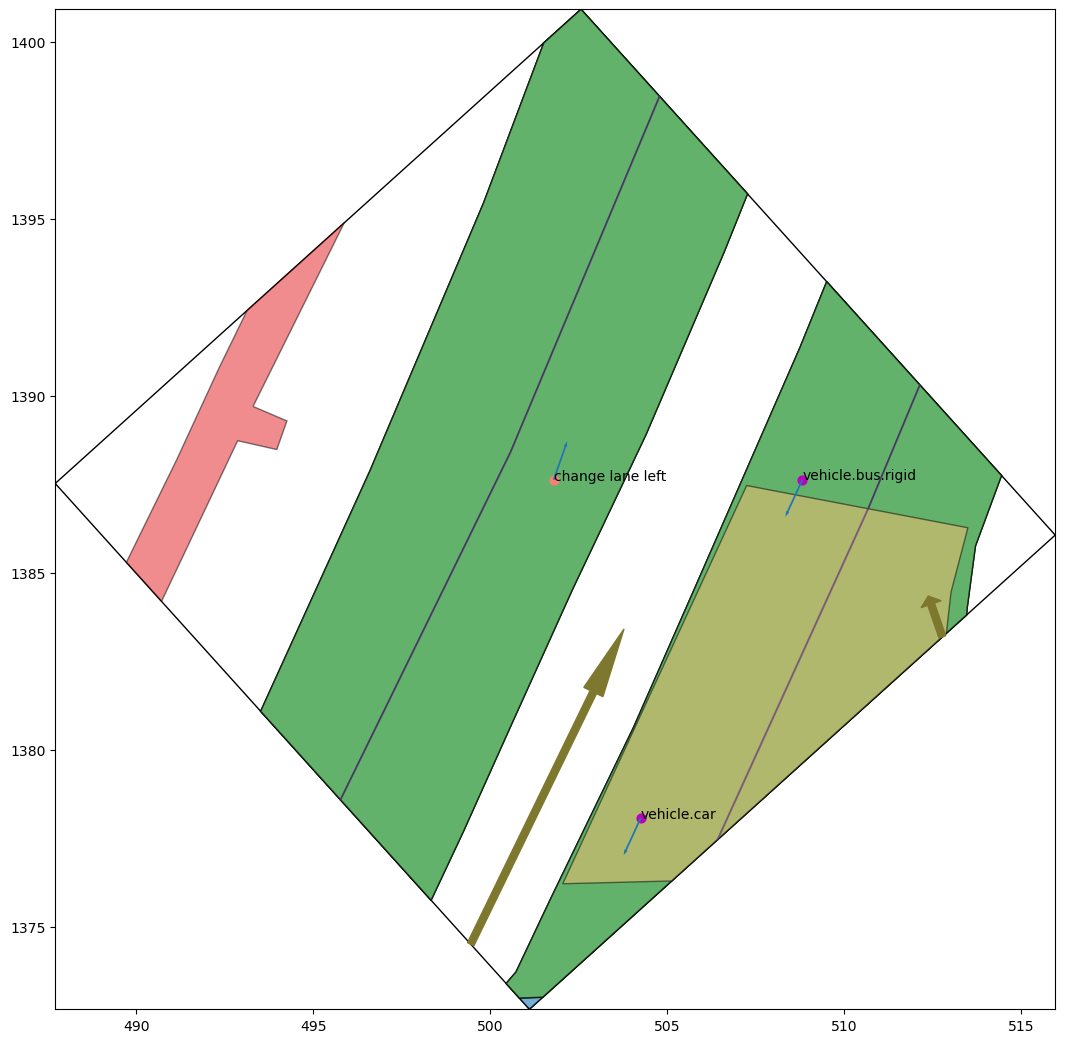

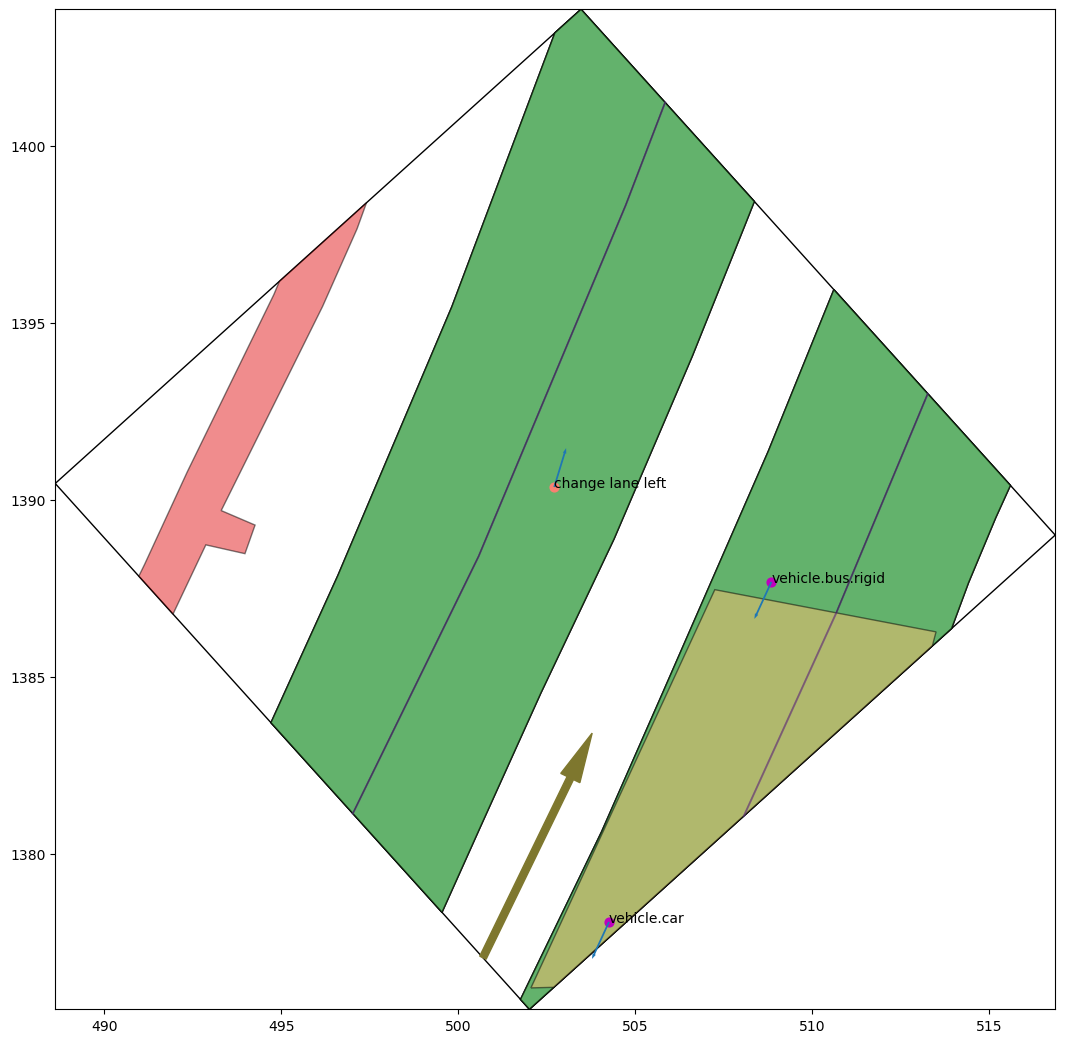

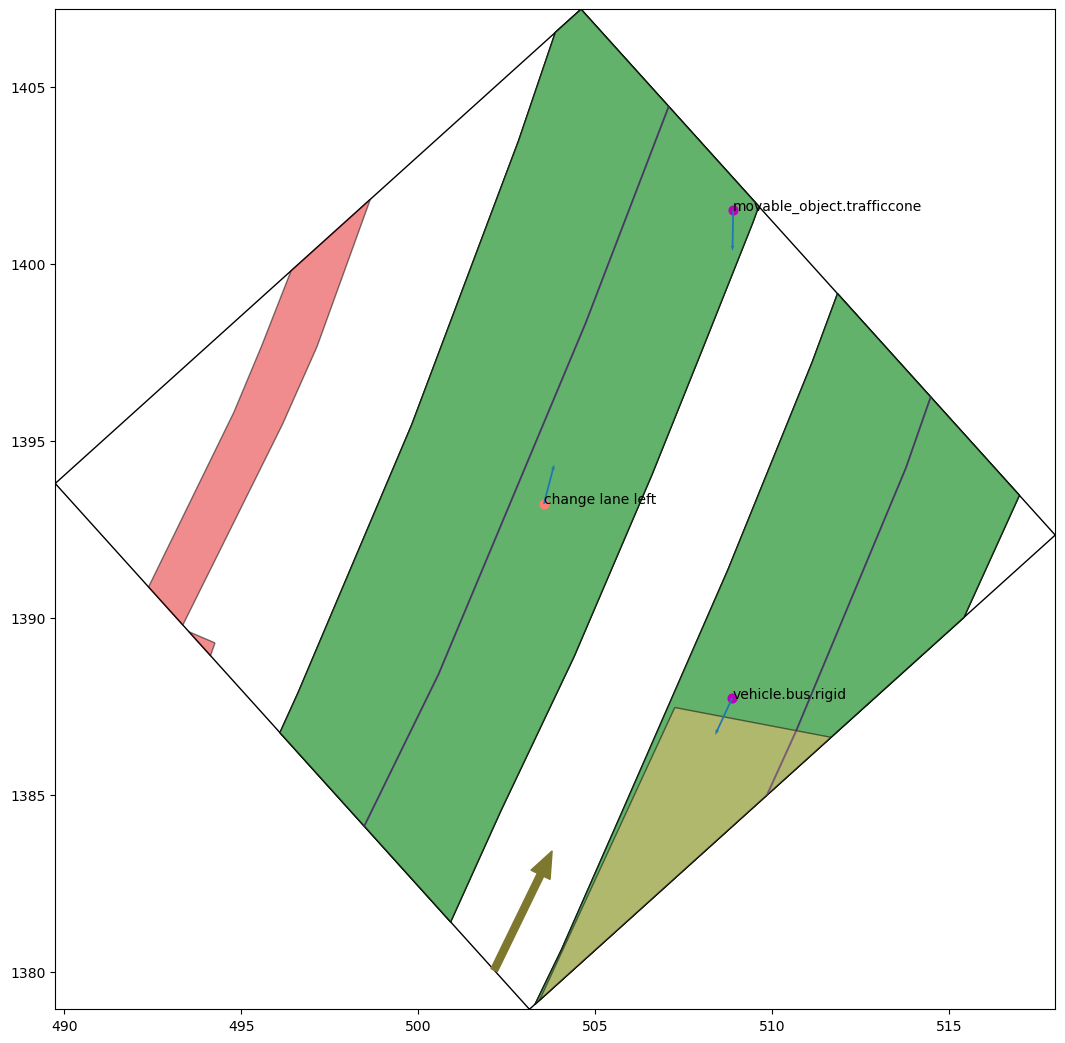

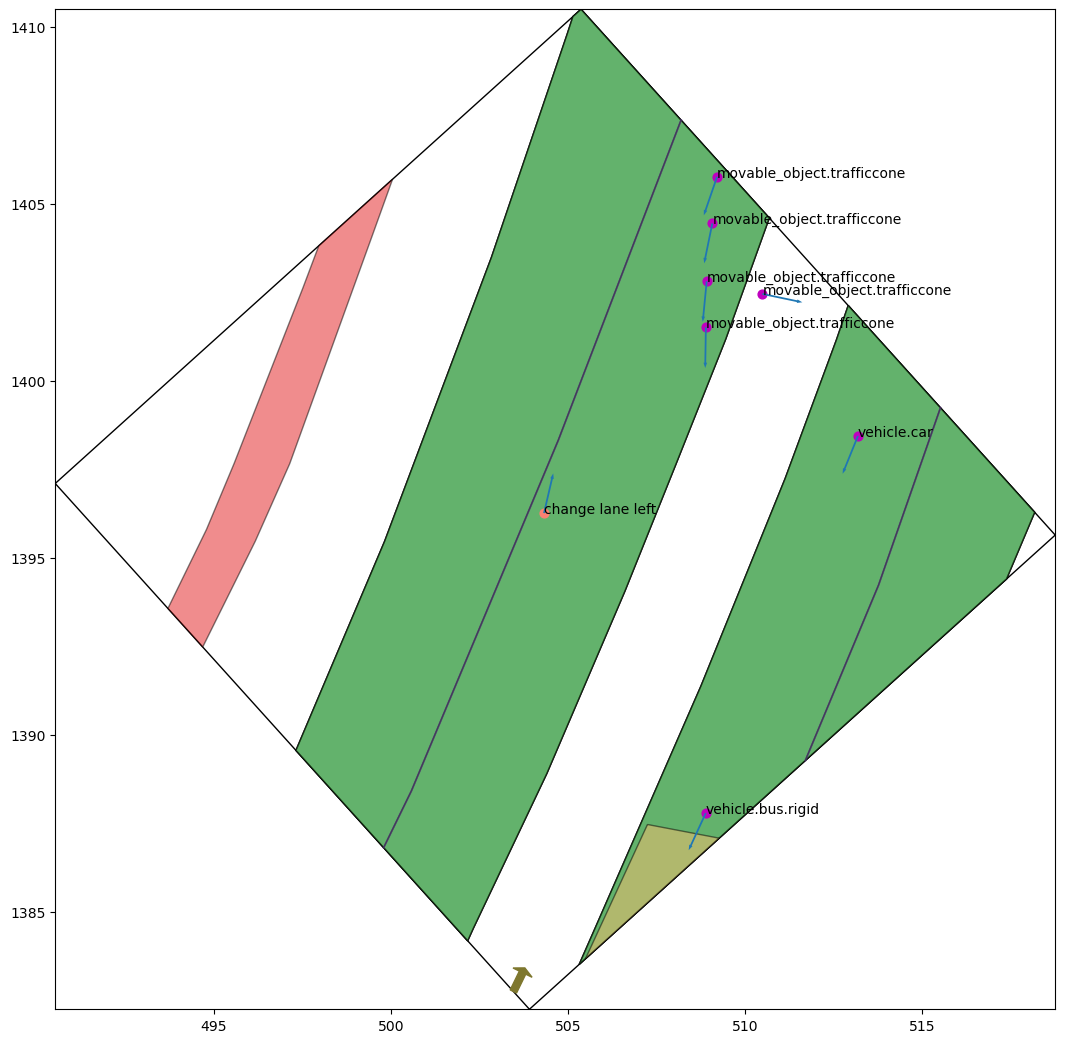

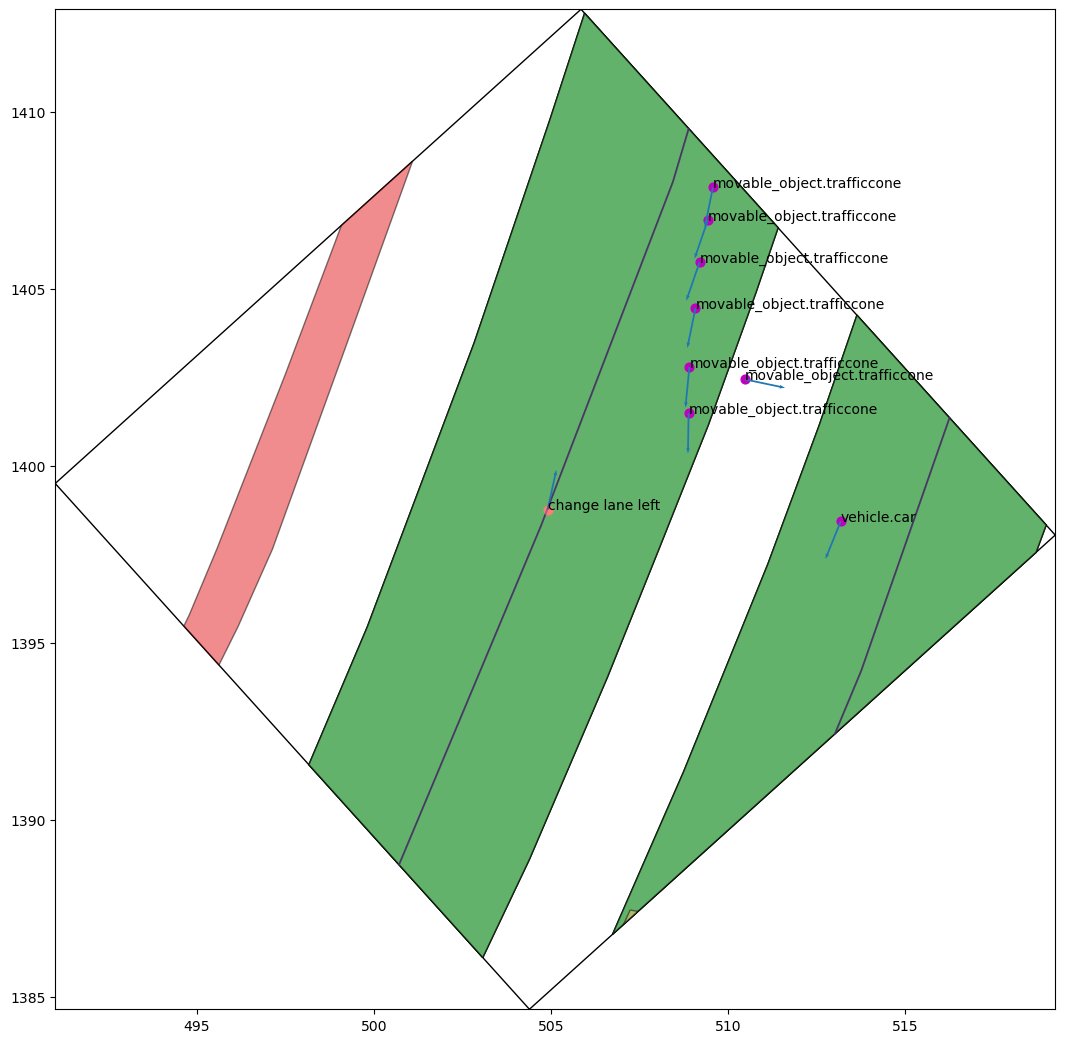

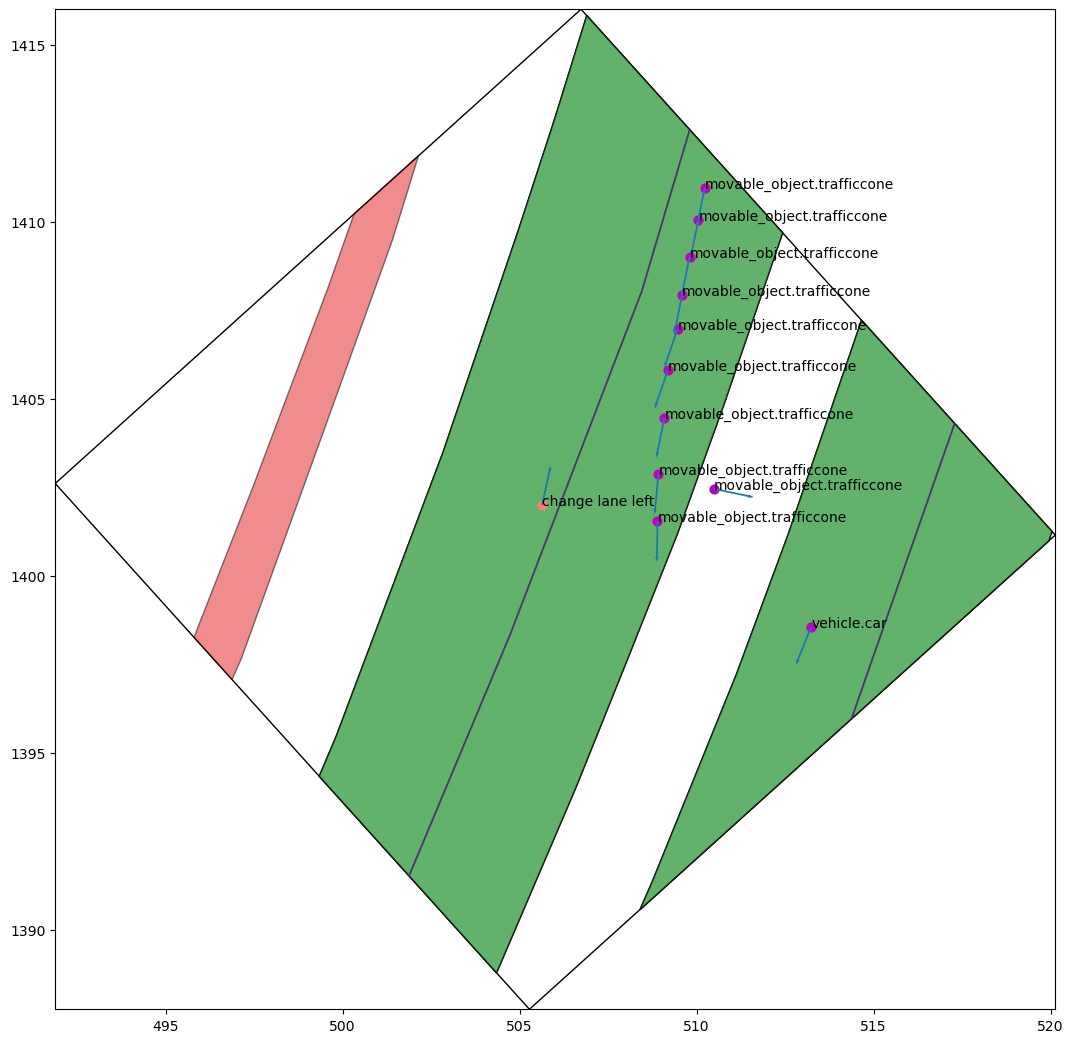

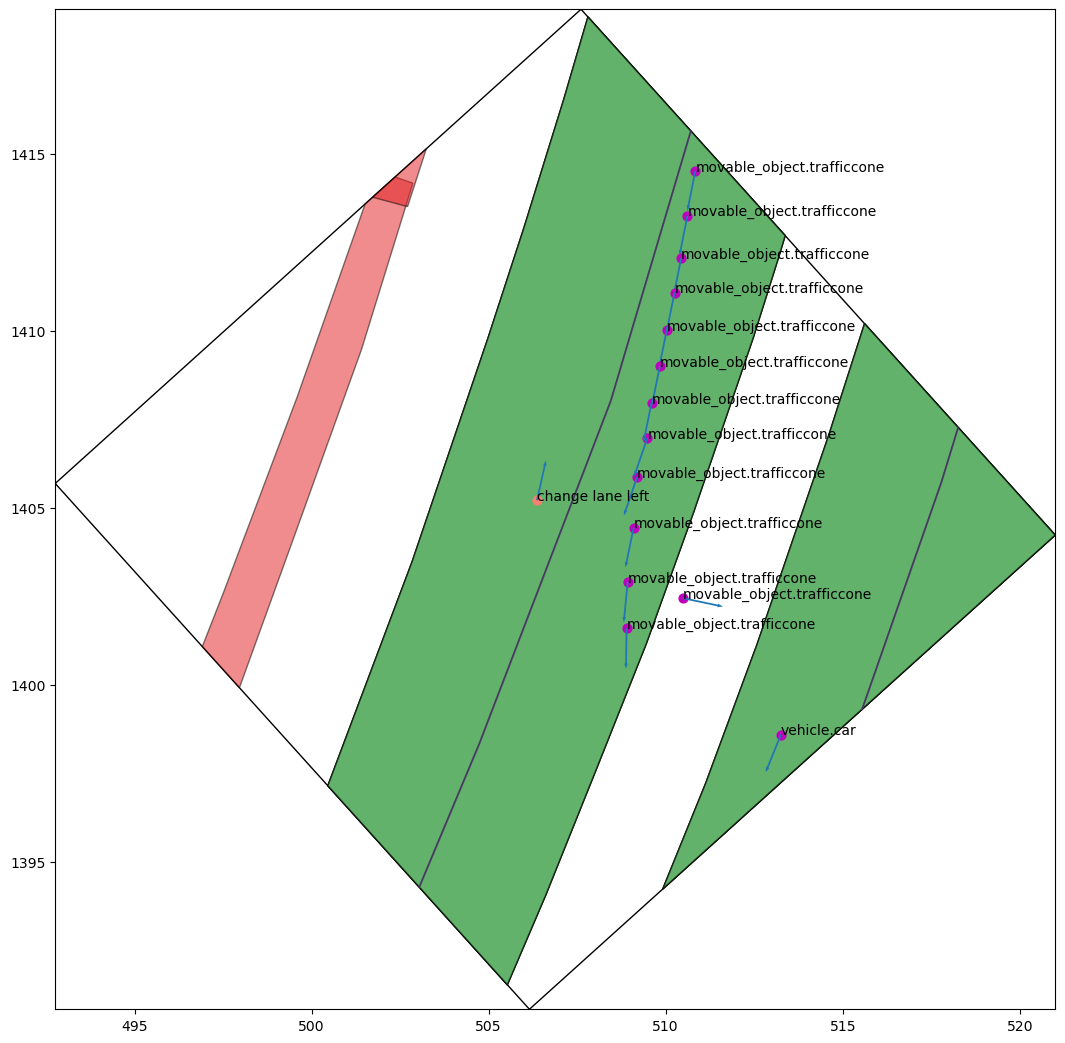

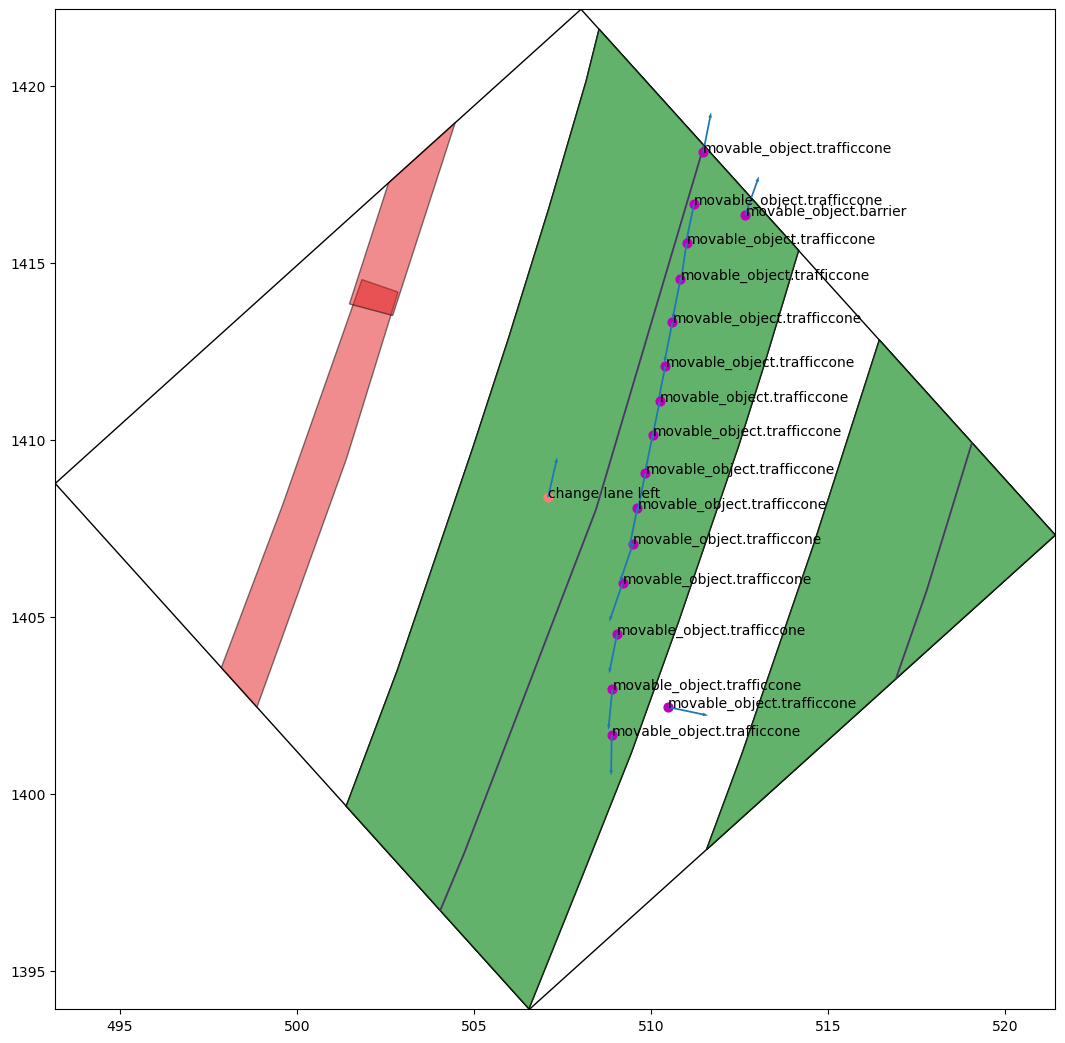

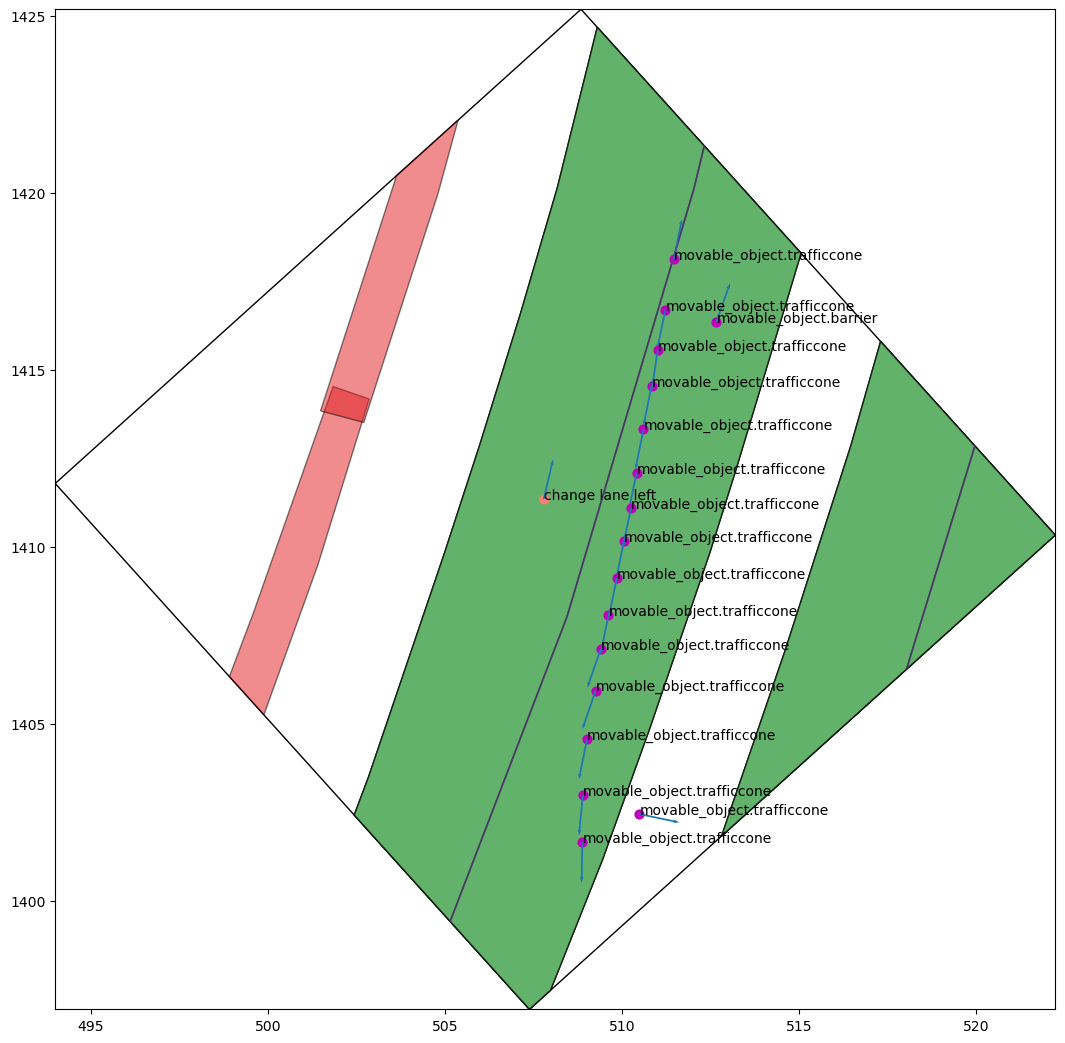

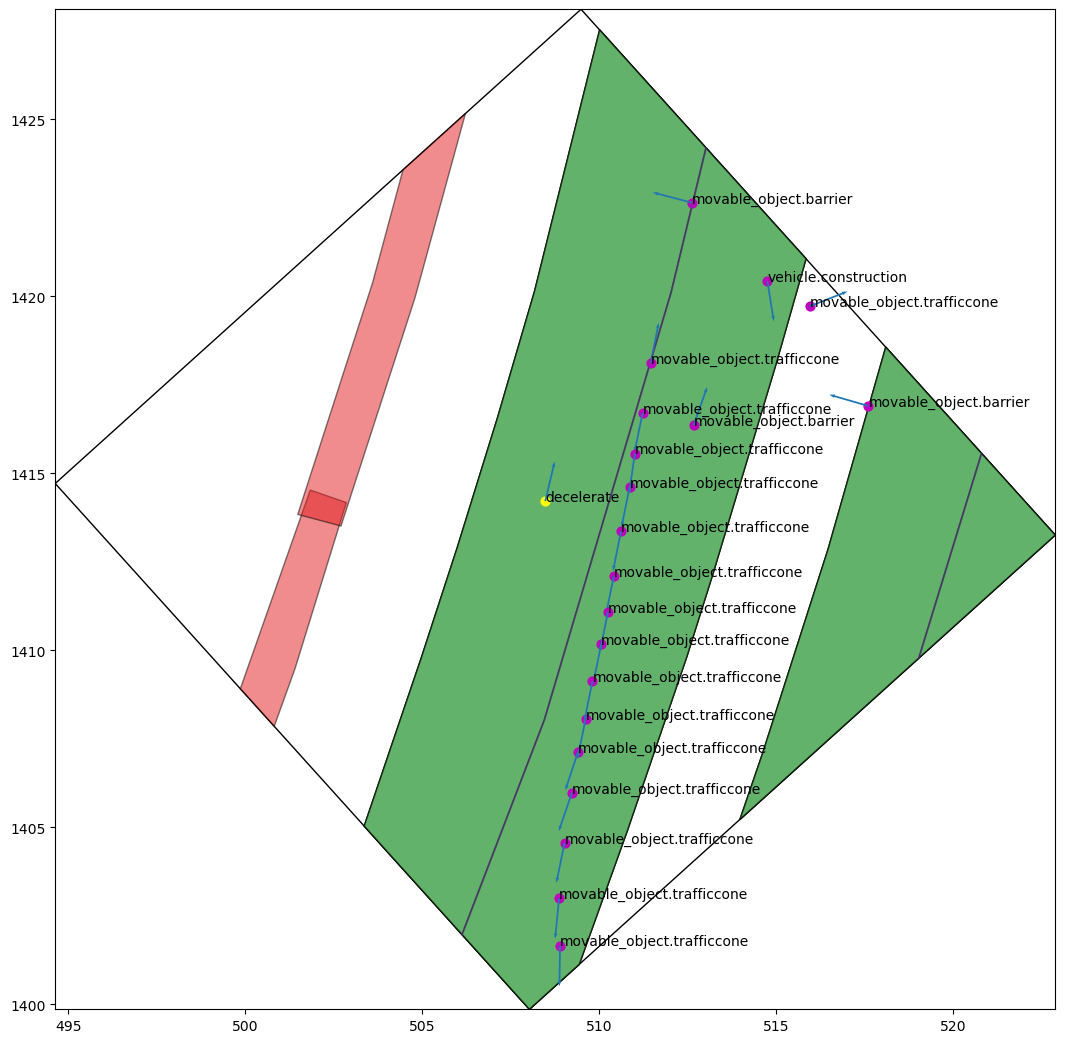

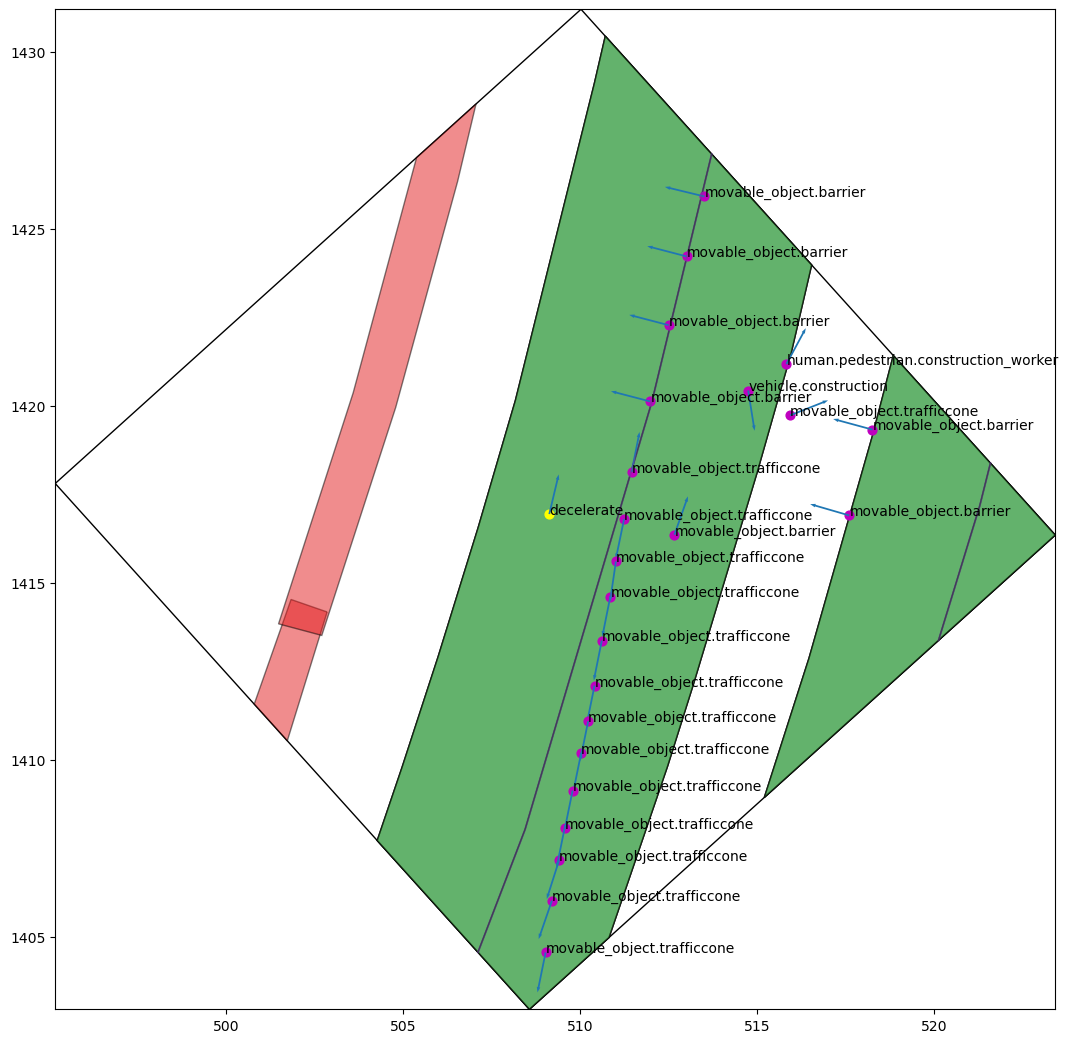

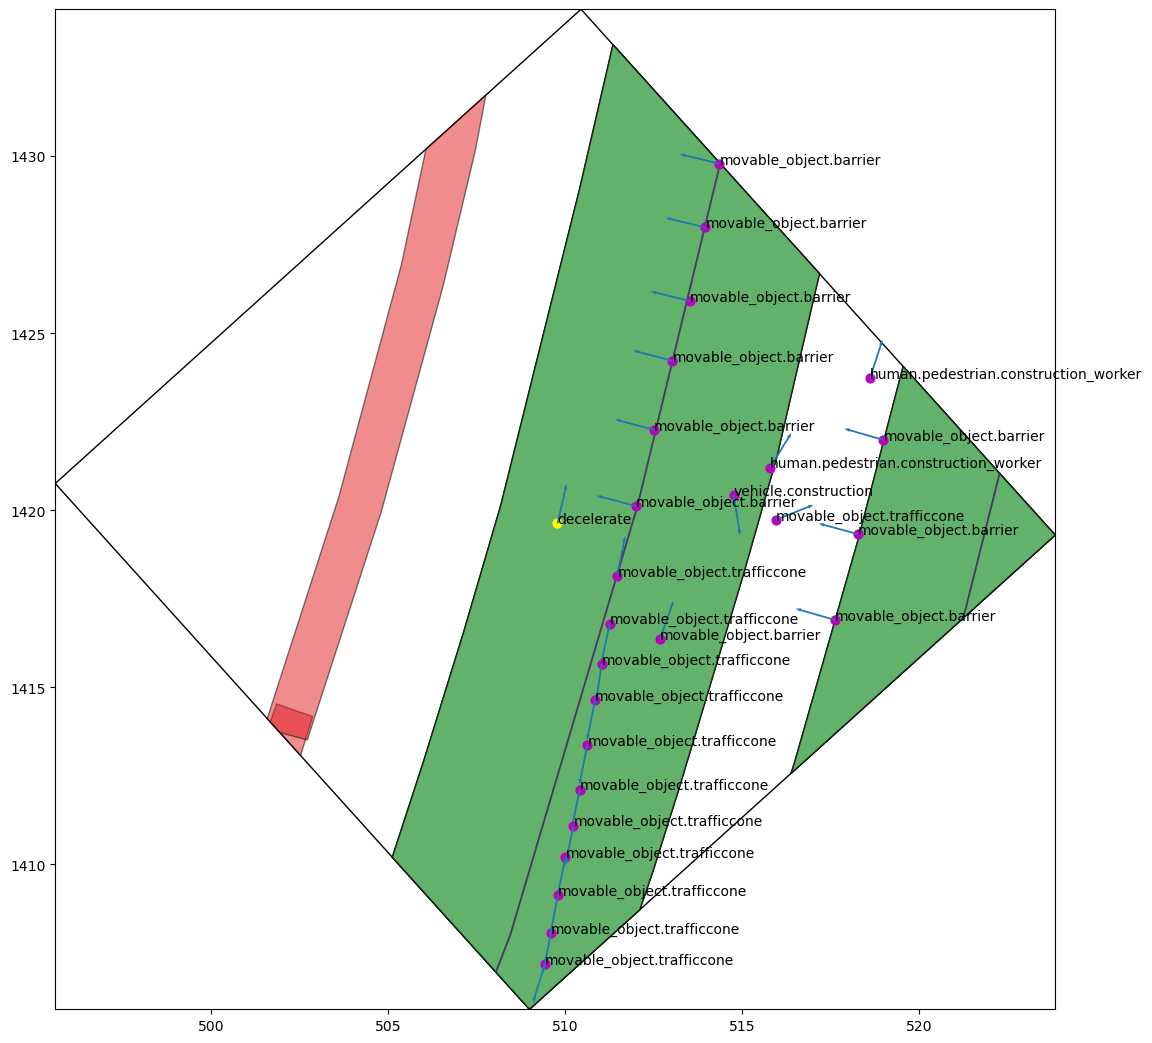

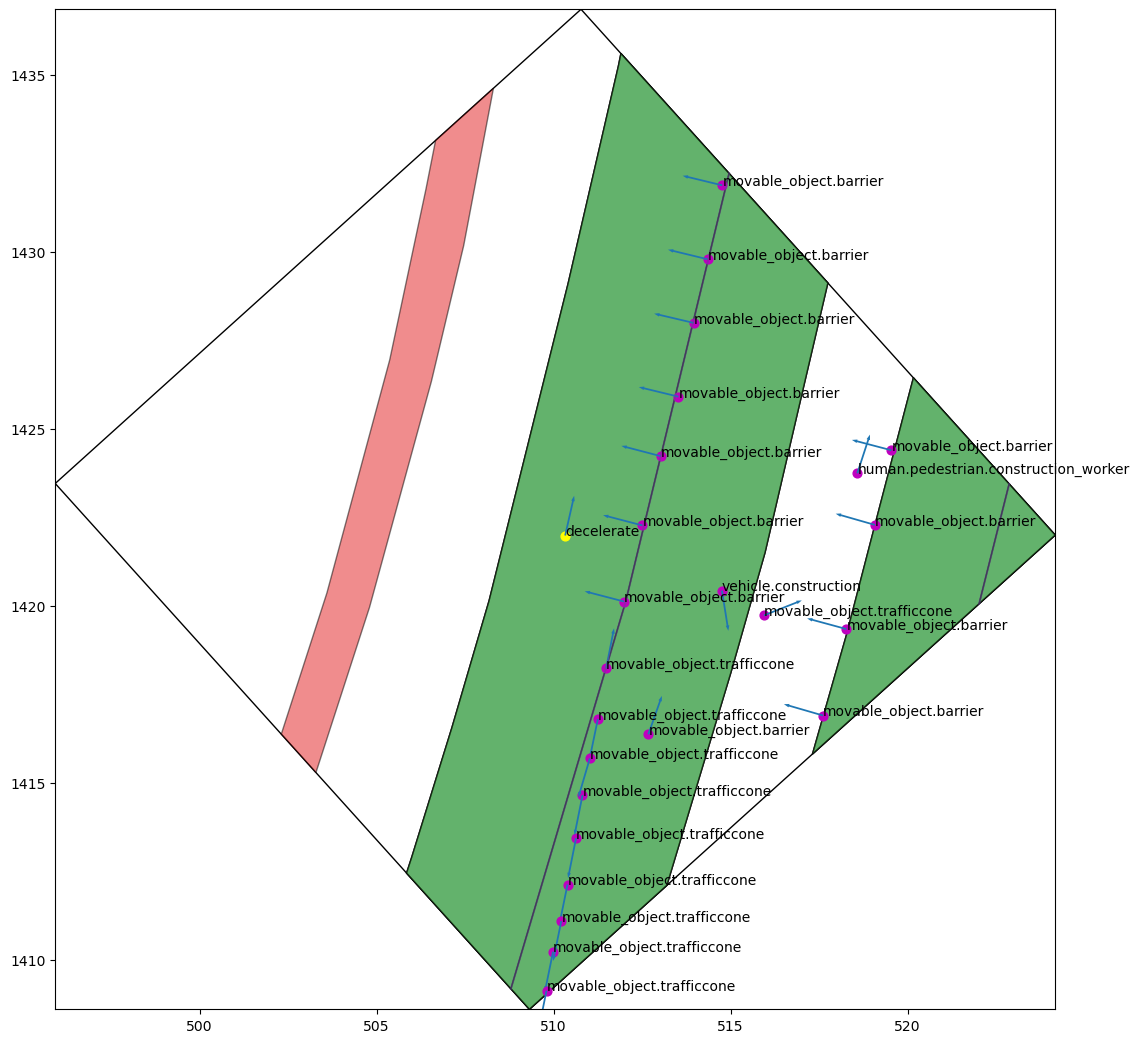

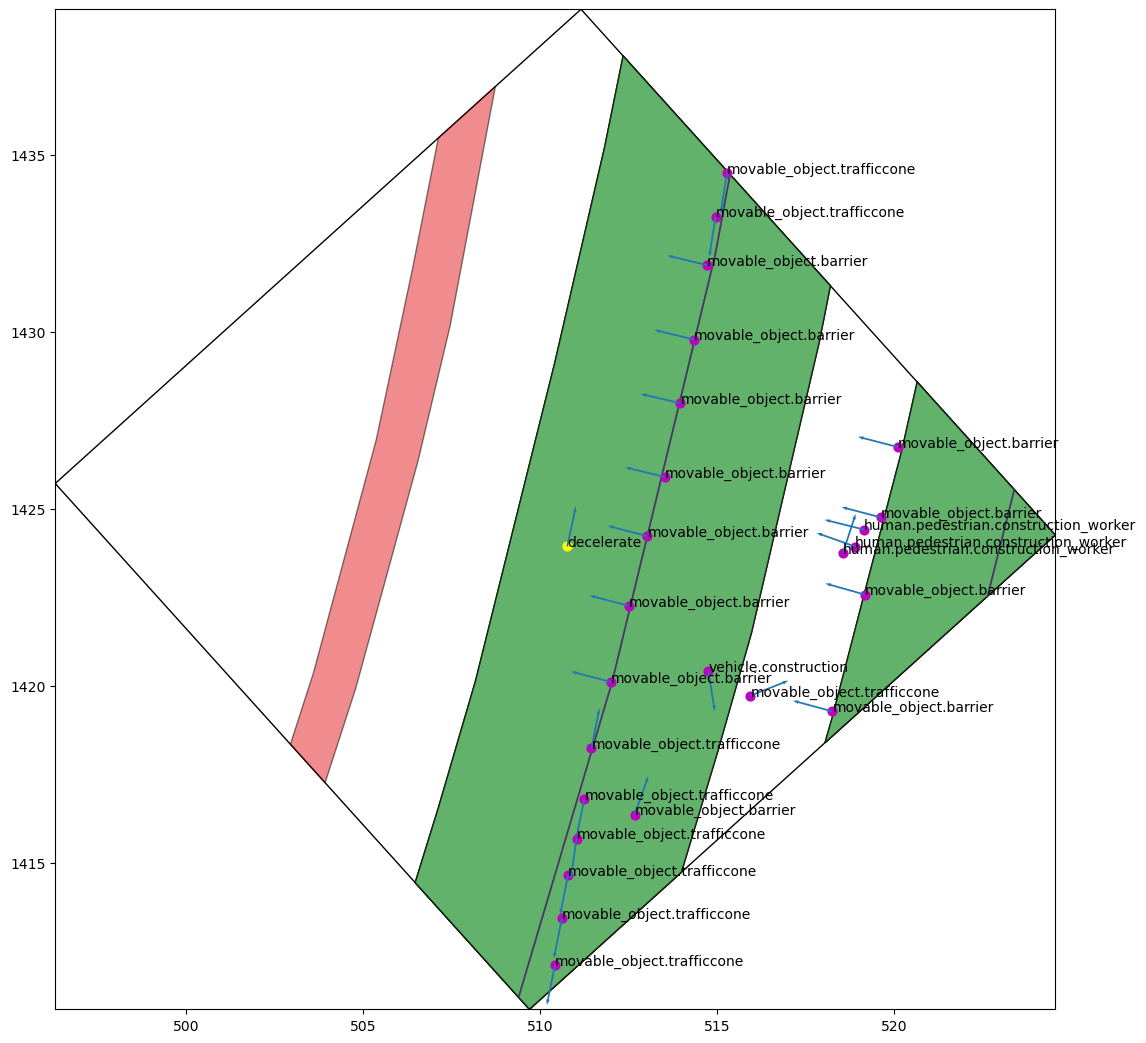

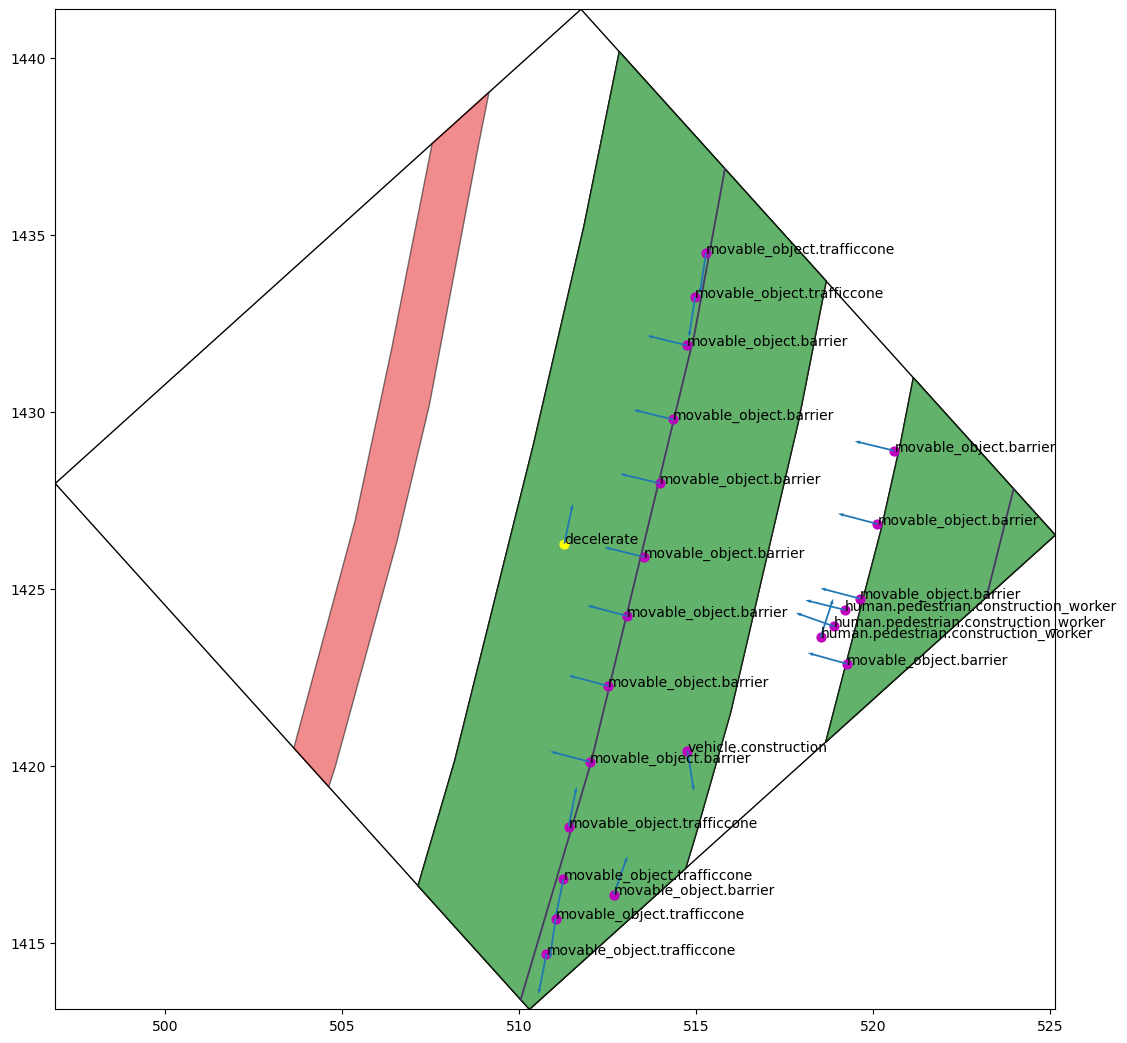

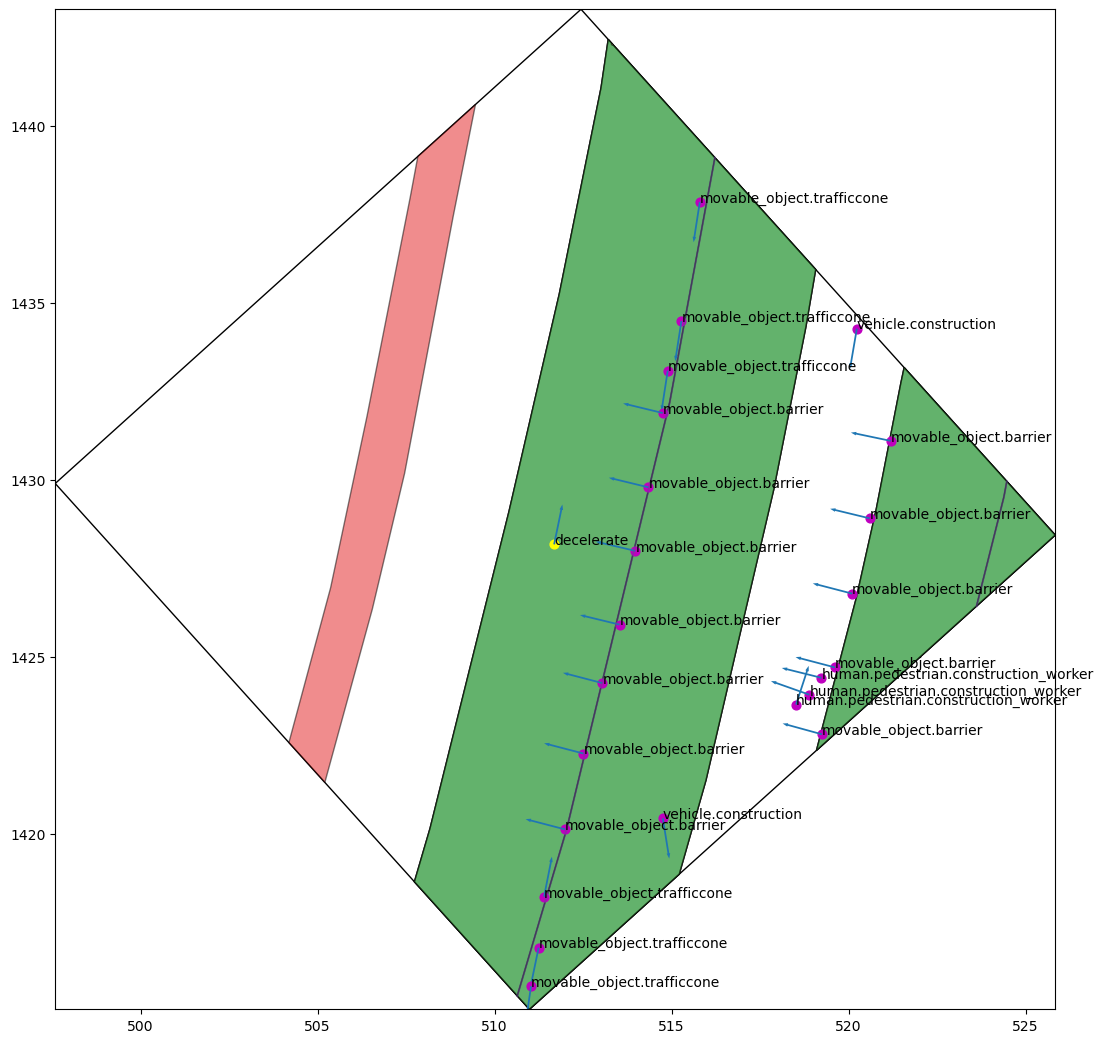

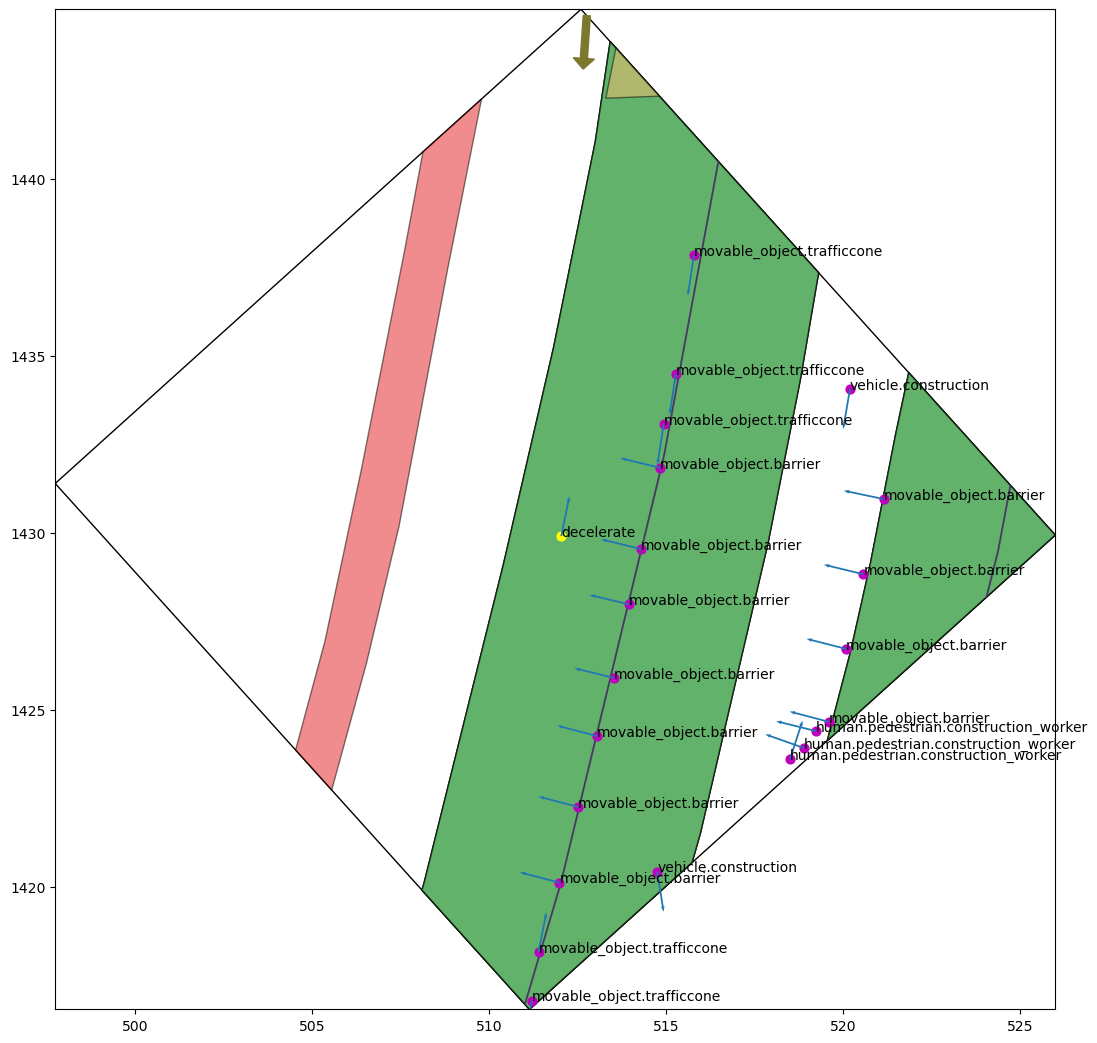

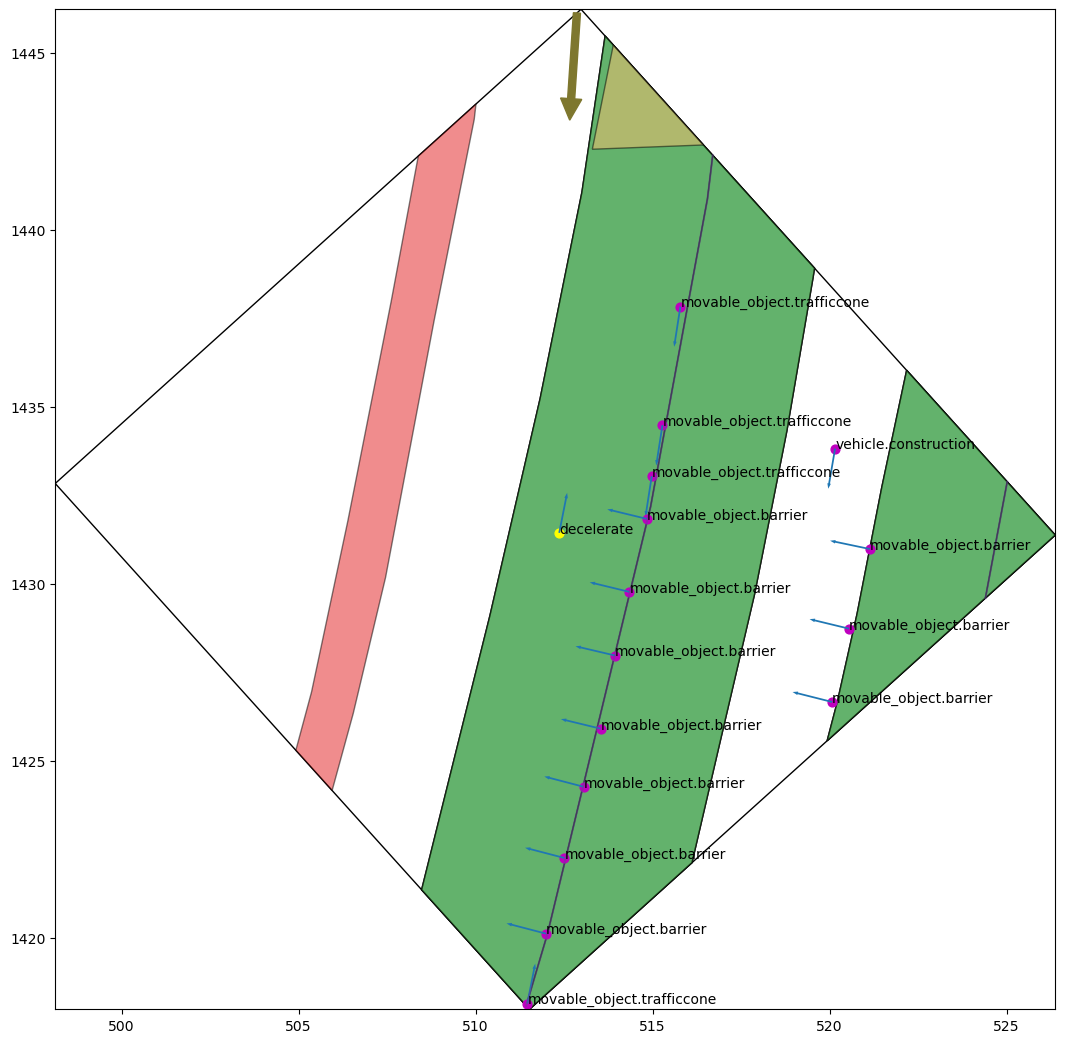

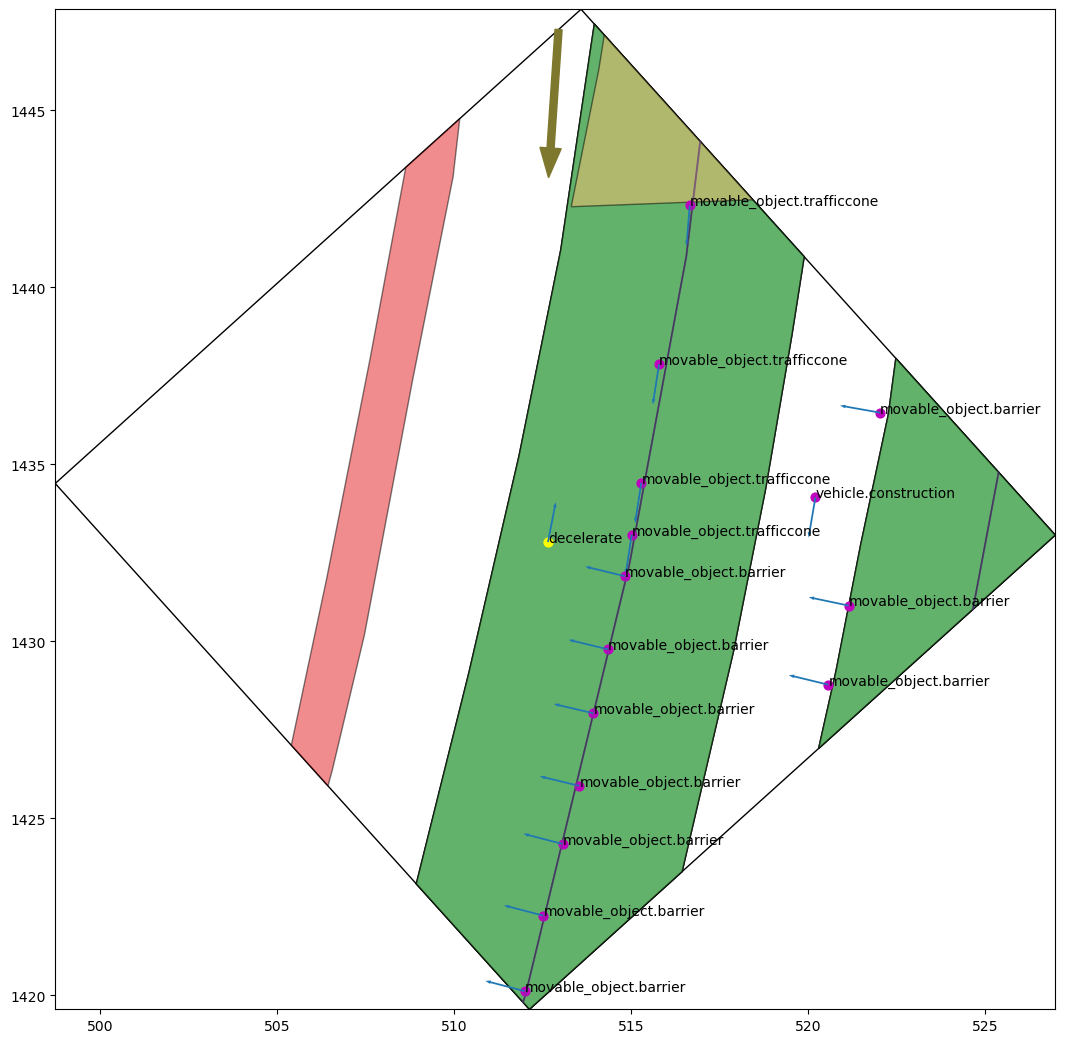

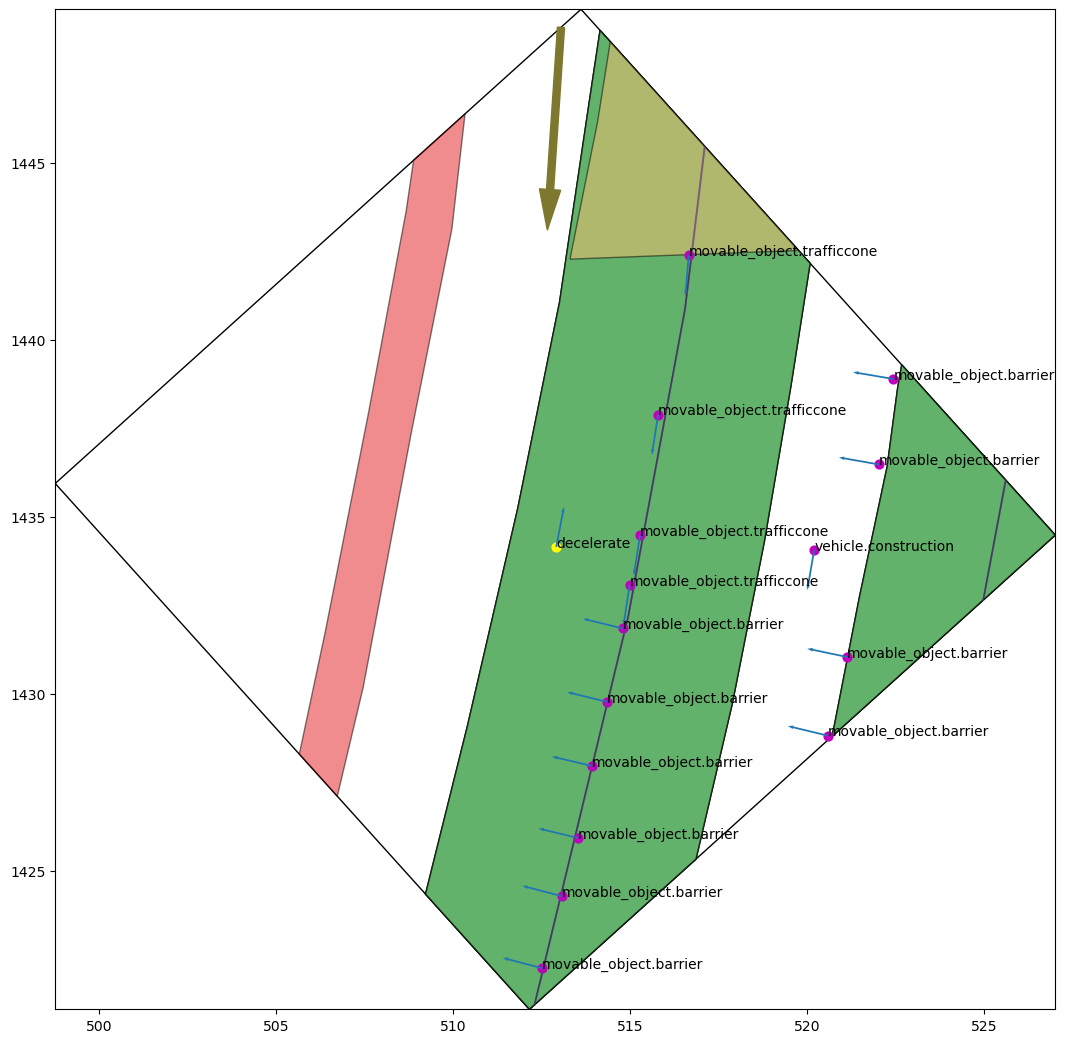

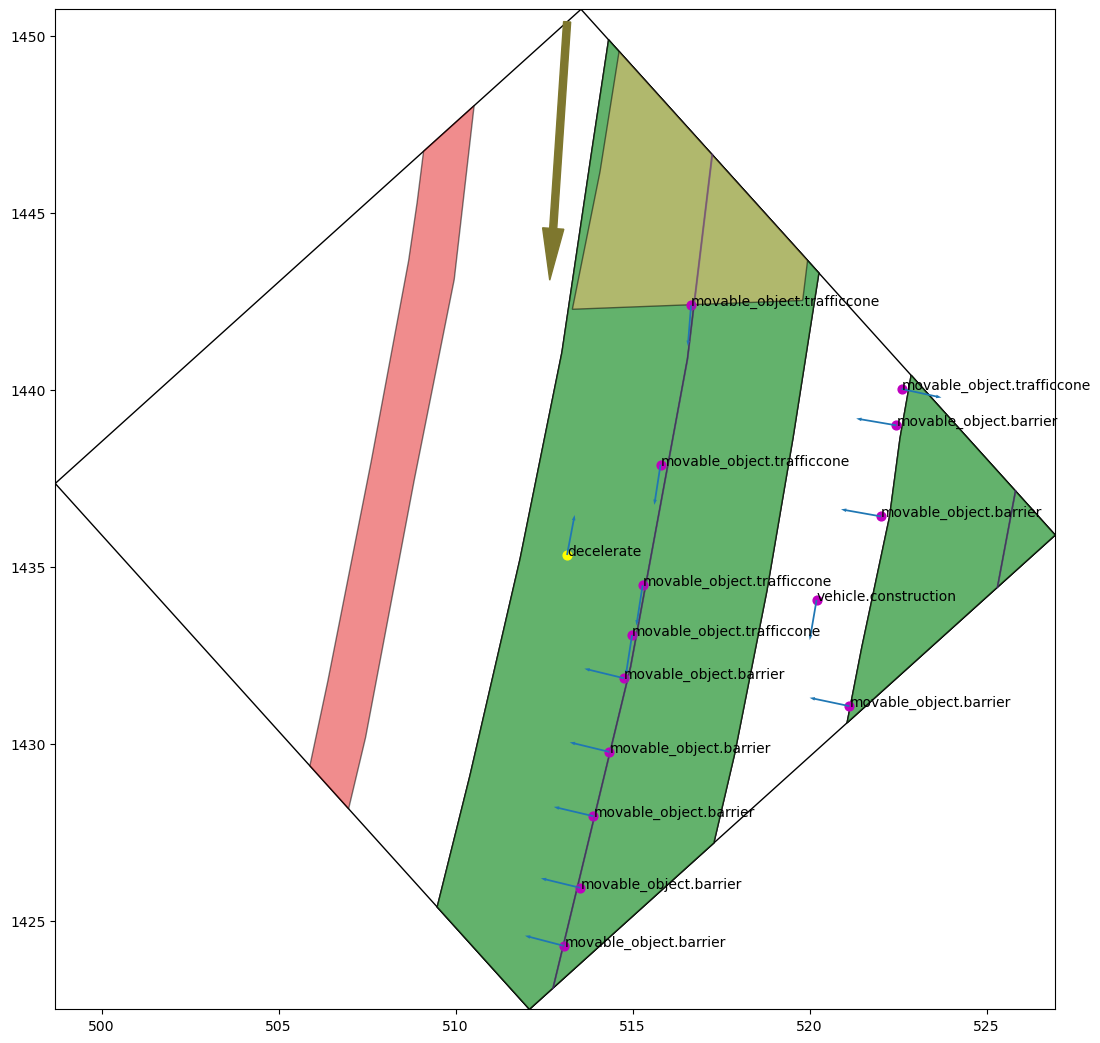

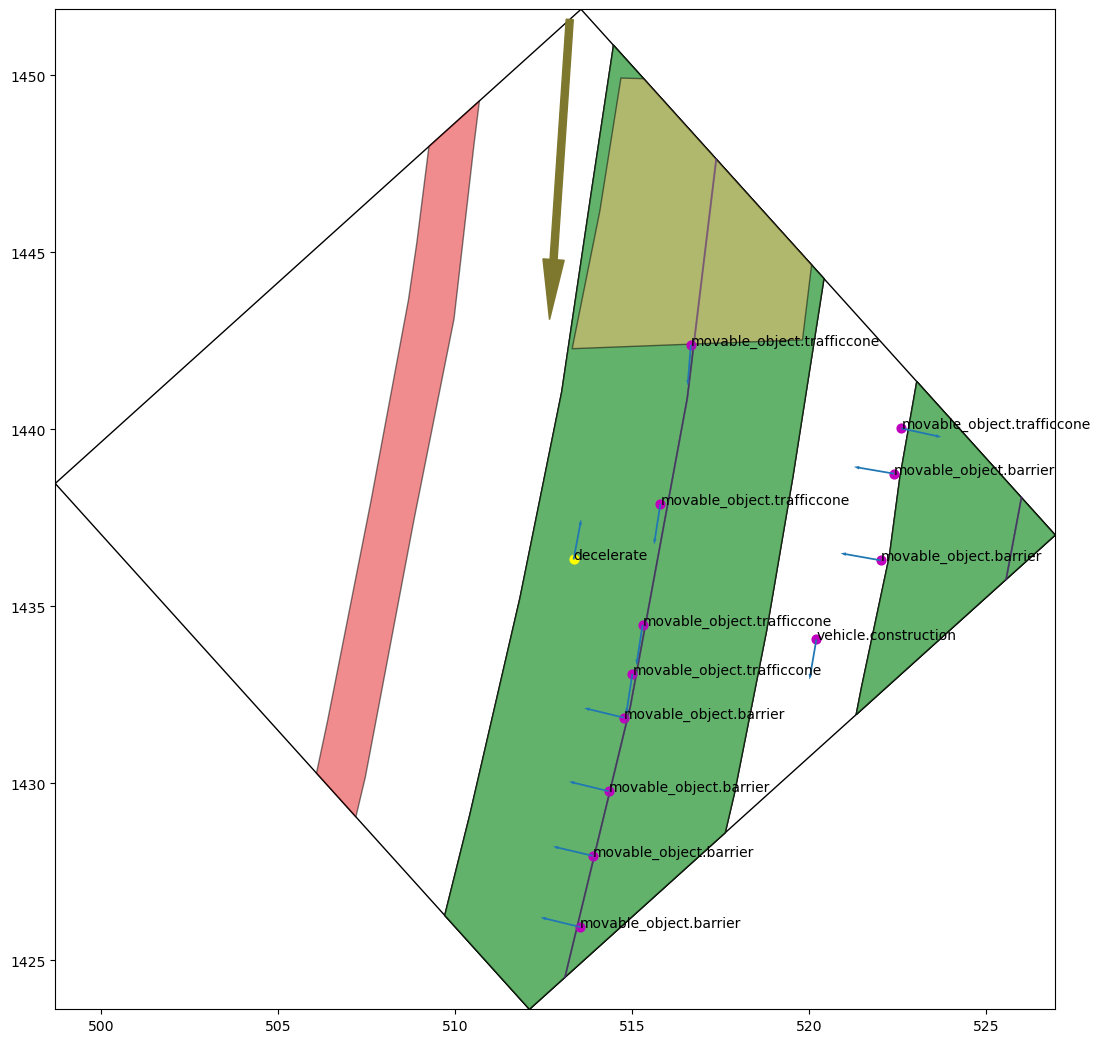

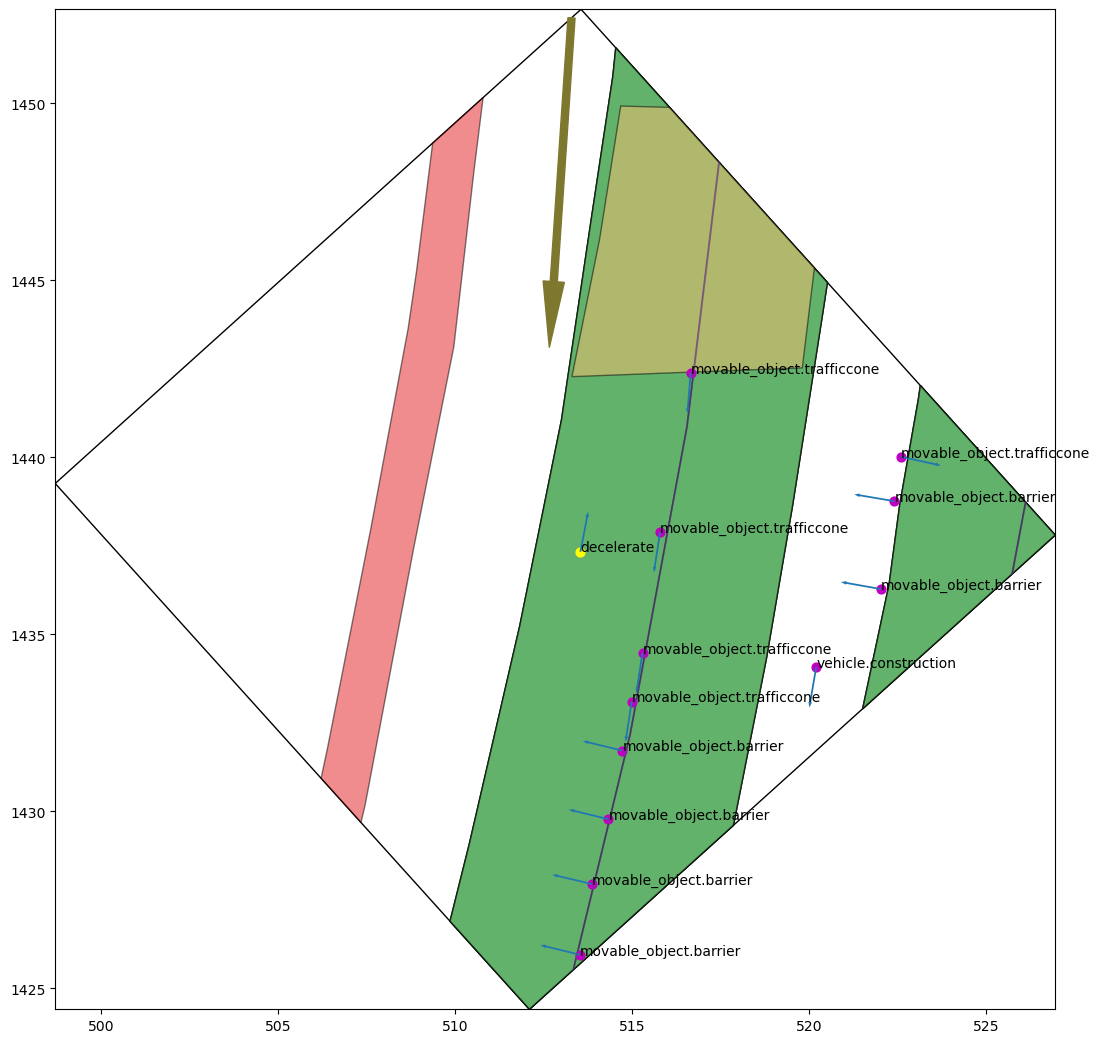

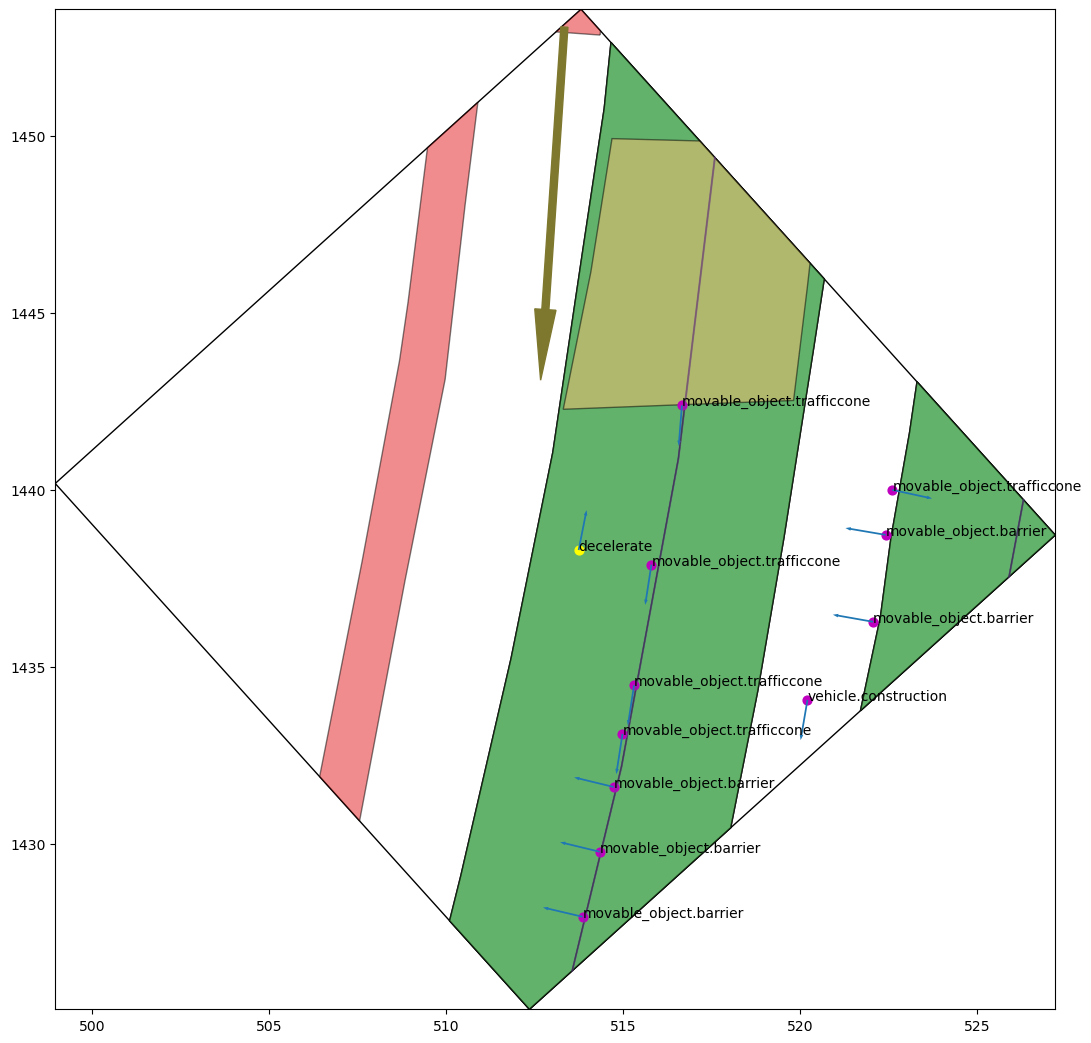

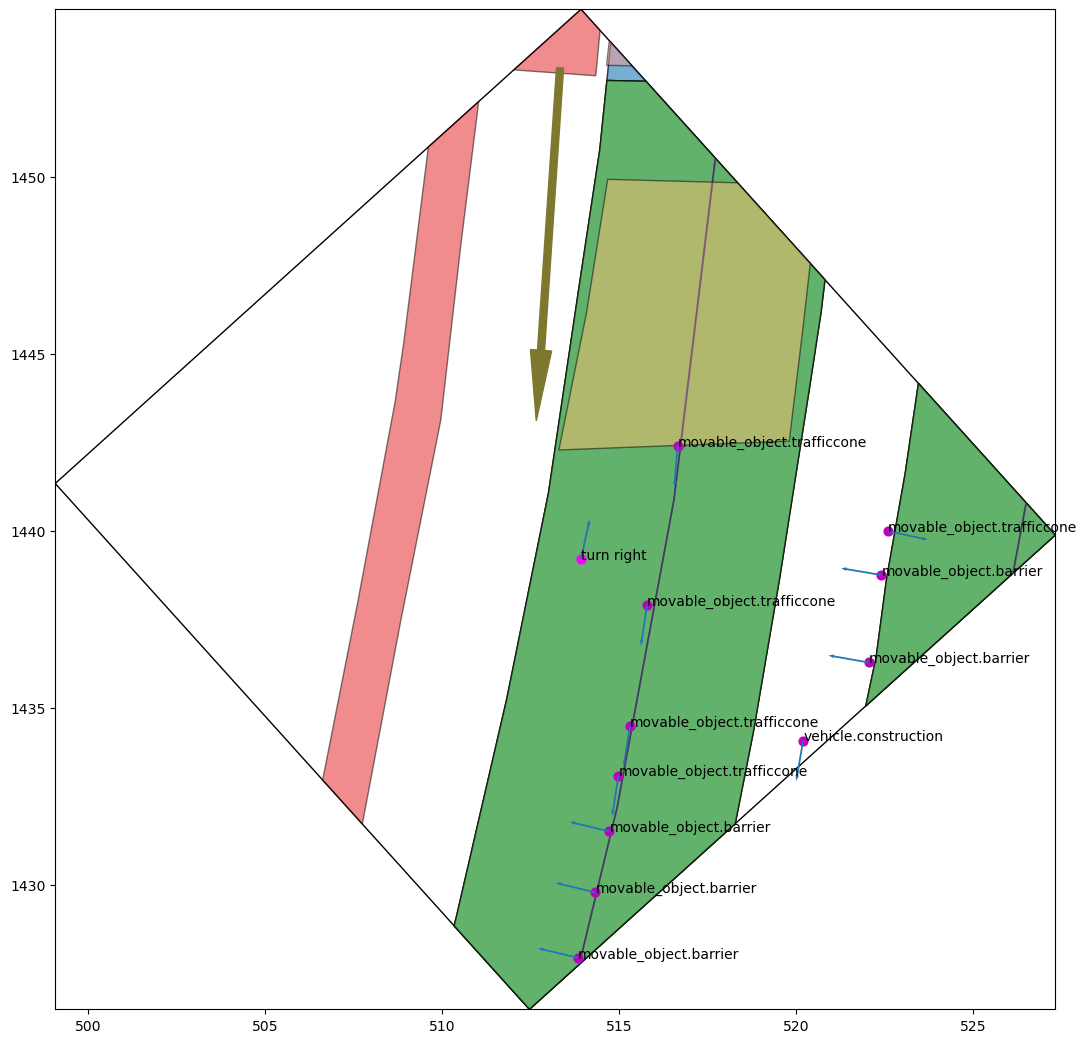

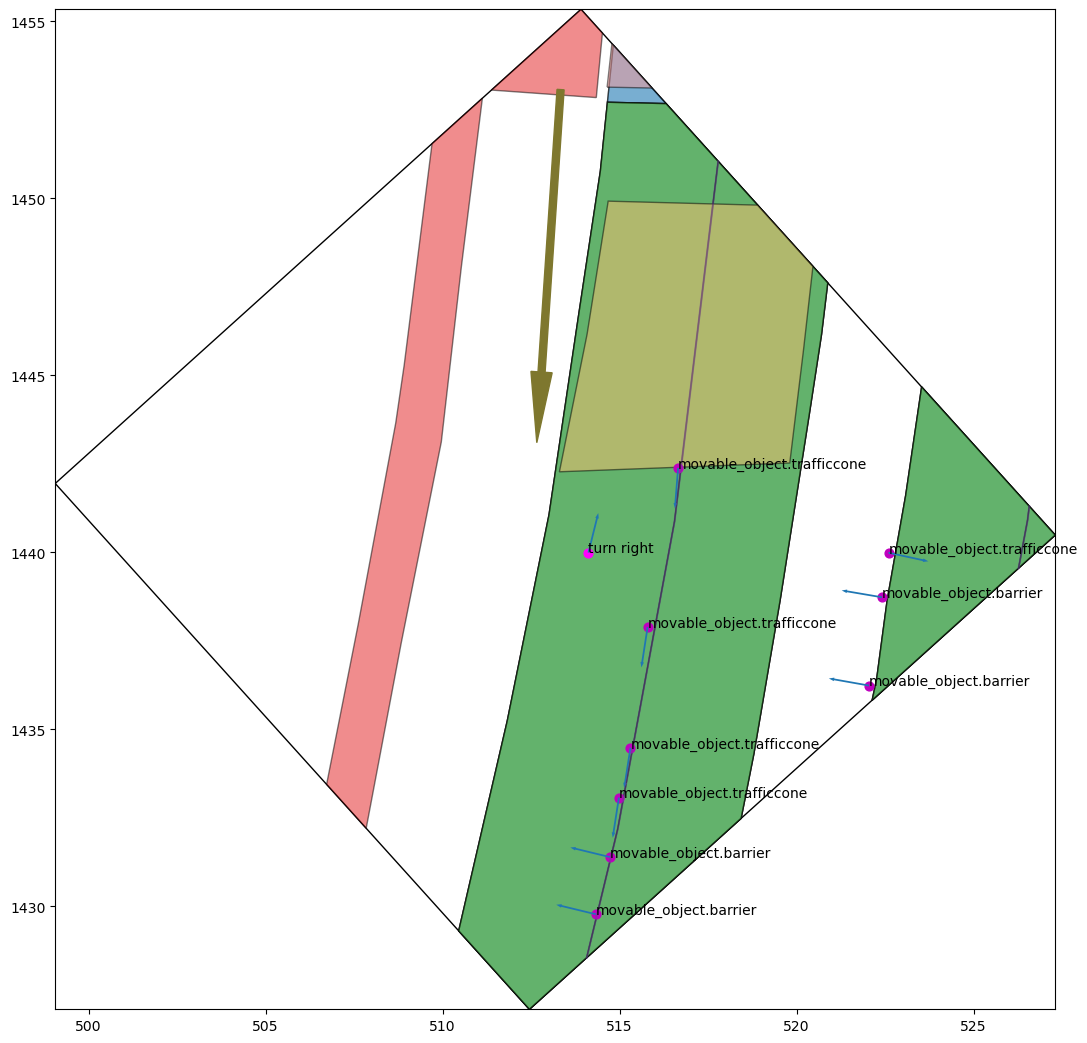

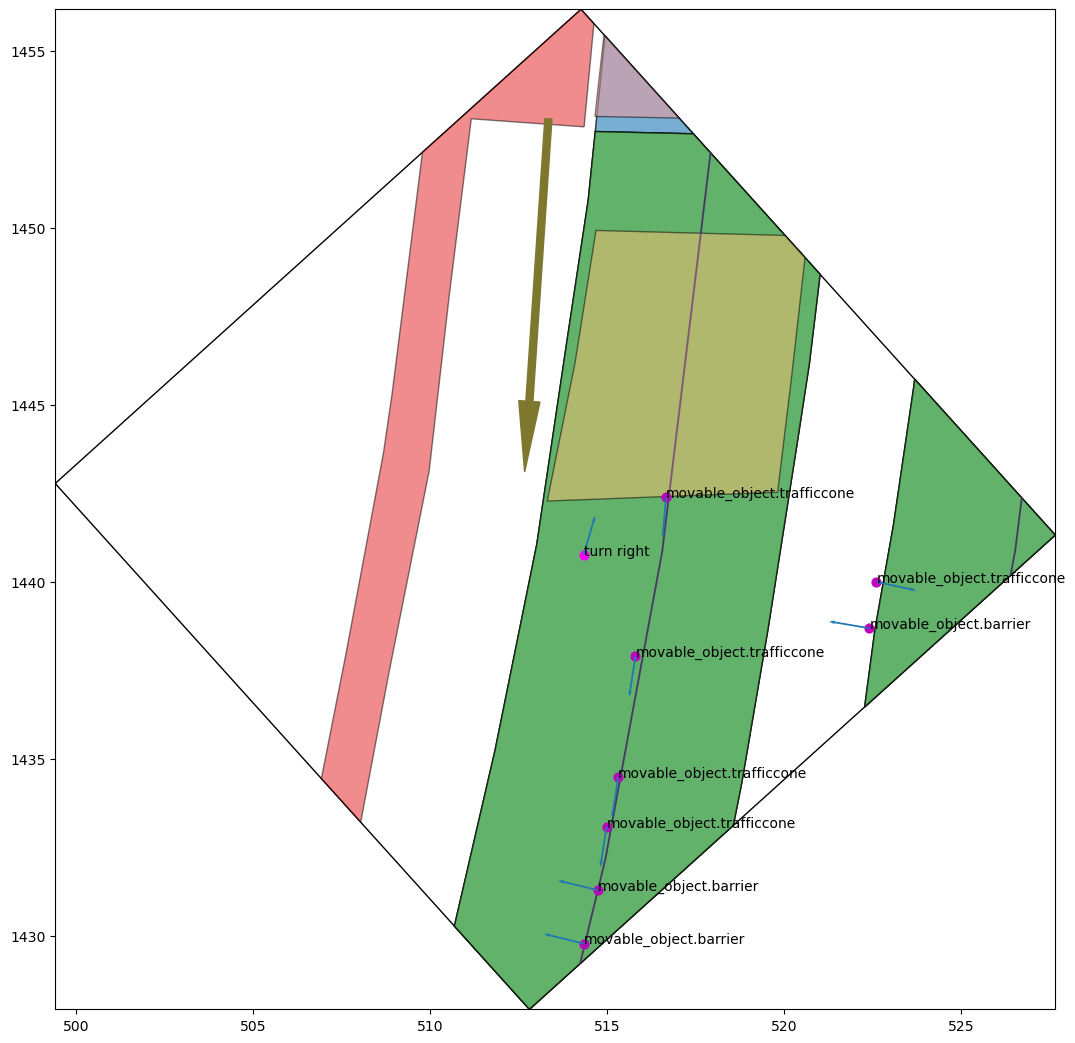

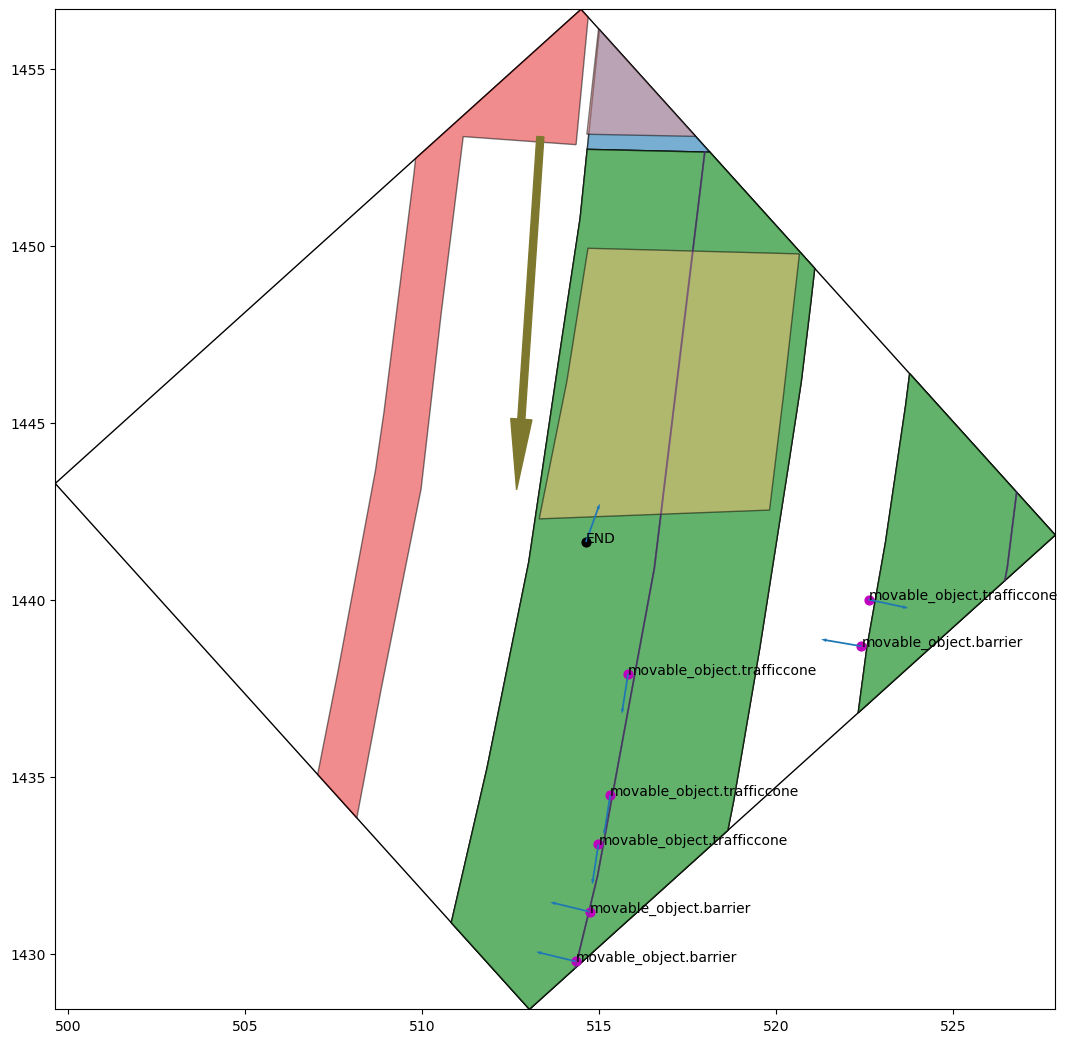

: 

In [40]:
traj = 12

render_trajectory('test_traj.gif', nusc_data[traj])